# **Prédiction TOTALGHGEmissions**

In [2]:
import sys
import importlib.metadata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st

In [3]:
# Afficher la version de Python
print("Python version:", sys.version)

# Afficher la version des bibliothèques déjà importées
print('\n'.join(f'{m.__name__} - {m.__version__}'
         for m in globals().values()
         if getattr(m, '__version__', None)))

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
json - 2.0.9
pandas - 2.2.2
pandas - 2.2.2
numpy - 1.26.4
seaborn - 0.13.2
statsmodels.api - 0.14.2


In [4]:
df_final=pd.read_csv('df_energy5.csv')
display(df_final.tail())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,BuildingAge,NumberofBuildings_log,NumberofFloors_log,PropertyGFATotal_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SteamUse(kBtu)_%_sqrt,TotalGHGEmissions_cat,SiteEnergyUseWN(kBtu)_cat
1605,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,35,0.693147,0.693147,9.416948,9.416948,0.000000,0.000000,0.0,2,1
1606,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,21,0.693147,0.693147,9.680406,9.680406,0.000000,0.000000,0.0,2,1
1607,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,51,0.693147,0.693147,9.484785,8.933796,8.626048,0.000000,0.0,6,5
1608,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,36,0.693147,0.693147,9.554072,8.795128,8.779865,6.184149,0.0,2,0
1609,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,...,87,0.693147,0.693147,9.812413,9.020632,8.987322,7.011214,0.0,3,1


In [5]:
df_final["TotalGHGEmissions_log"] = np.log1p(df_final['TotalGHGEmissions'])

In [6]:
display(df_final.tail())

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,NumberofBuildings_log,NumberofFloors_log,PropertyGFATotal_log,LargestPropertyUseTypeGFA_log,SecondLargestPropertyUseTypeGFA_log,ThirdLargestPropertyUseTypeGFA_log,SteamUse(kBtu)_%_sqrt,TotalGHGEmissions_cat,SiteEnergyUseWN(kBtu)_cat,TotalGHGEmissions_log
1605,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,0.693147,0.693147,9.416948,9.416948,0.000000,0.000000,0.0,2,1,3.088311
1606,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,0.693147,0.693147,9.680406,9.680406,0.000000,0.000000,0.0,2,1,3.501646
1607,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,0.693147,0.693147,9.484785,8.933796,8.626048,0.000000,0.0,6,5,5.414054
1608,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,0.693147,0.693147,9.554072,8.795128,8.779865,6.184149,0.0,2,0,3.140265
1609,50226,2016,Nonresidential COS,Mixed Use Property,Van Asselt Community Center,2820 S Myrtle St,Seattle,WA,NaN,7857002030,...,0.693147,0.693147,9.812413,9.020632,8.987322,7.011214,0.0,3,1,3.744078


In [7]:
colonnes_quanti_hors_ES = ['NumberofBuildings', 
                  'NumberofFloors',
                  'PropertyGFATotal',
                  'LargestPropertyUseTypeGFA',
                  'SecondLargestPropertyUseTypeGFA',
                  'ThirdLargestPropertyUseTypeGFA',
                  'Electricity_%',
                  'NaturalGas(kBtu)_%',
                  'SteamUse(kBtu)_%',
                  'BuildingAge']

In [8]:
colonnes_quanti_transformed_hors_ES= ["NumberofBuildings_log",
                              "NumberofFloors_log",
                              "PropertyGFATotal_log",
                              "LargestPropertyUseTypeGFA_log",
                              "SecondLargestPropertyUseTypeGFA_log",
                              "ThirdLargestPropertyUseTypeGFA_log",
                              'Electricity_%',
                              'NaturalGas(kBtu)_%',
                              "SteamUse(kBtu)_%_sqrt",
                              'BuildingAge']

In [9]:
colonnes_quali=['BuildingType',
                'PrimaryPropertyType',
                'Neighborhood', 
                'LargestPropertyUseType', 
                'SecondLargestPropertyUseType', 
                'ThirdLargestPropertyUseType']

## **Prédiction sans ENERGYSTARScore**

Modèle de base: Cible brute/ Features brute

Variantes testées: 
- Variante 1: Cible brute/Feature log
- Variante 2: Cible log/ Feature brute
- Variante 3: Cible log/ Feature log

### **Split**

#### Base

In [14]:
import joblib 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA

# Sélection des features (X) et de la cible (y)
# Features transformés hors ES
X_brut= df_final[colonnes_quali + colonnes_quanti_hors_ES] # Features
y_brut = df_final[['TotalGHGEmissions']] # Cibles à prédire

# Réinitialisation des indices pour éviter tout désalignement
X_brut = X_brut.reset_index(drop=True)
y_brut = y_brut.reset_index(drop=True)

# Affichage des dimensions pour vérification
print("Après nettoyage et réinitialisation :")
print("Taille de X_brut :", X_brut.shape)
print("Taille de y_brut :", y_brut.shape)

# Division des données en jeu d'entraînement et de test
X_train_brut, X_test_brut, y_train_brut, y_test_brut = train_test_split(X_brut, y_brut, test_size=0.2, random_state=42)

# Réassignation des noms de colonne pour les séries
y_train_brut.name = 'TotalGHGEmissions'
y_test_brut.name = 'TotalGHGEmissions'

print("Après split :")
print("Taille de X_train_brut:", X_train_brut.shape)
print("Taille de X_test_brut:", X_test_brut.shape)
print("Taille de y_train_brut :", y_train_brut.shape)
print("Taille de y_test_brut :", y_test_brut.shape)


Après nettoyage et réinitialisation :
Taille de X_brut : (1610, 16)
Taille de y_brut : (1610, 1)
Après split :
Taille de X_train_brut: (1288, 16)
Taille de X_test_brut: (322, 16)
Taille de y_train_brut : (1288, 1)
Taille de y_test_brut : (322, 1)


#### b. Brute /Features transformés

In [16]:
# Sélection des features (X) et de la cible (y)
# Features transformés hors ES
X_transformed = df_final[colonnes_quali + colonnes_quanti_transformed_hors_ES] # Features

# Réinitialisation des indices pour éviter tout désalignement
X_transformed = X_transformed.reset_index(drop=True)
y_brut = y_brut.reset_index(drop=True)

# Affichage des dimensions pour vérification
print("Après nettoyage et réinitialisation :")
print("Taille de X :", X_transformed.shape)
print("Taille de y :", y_brut.shape)

# Division des données en jeu d'entraînement et de test
X_train_transformed, X_test_transformed, y_train_brut, y_test_brut = train_test_split(X_transformed, y_brut, test_size=0.2, random_state=42)

print("Taille de X_train_transformed:", X_train_transformed.shape)
print("Taille de X_test_transformed:", X_test_transformed.shape)
print("Taille de y_train_brut :", y_train_brut.shape)
print("Taille de y_test_brut :", y_test_brut.shape)

Après nettoyage et réinitialisation :
Taille de X : (1610, 16)
Taille de y : (1610, 1)
Taille de X_train_transformed: (1288, 16)
Taille de X_test_transformed: (322, 16)
Taille de y_train_brut : (1288, 1)
Taille de y_test_brut : (322, 1)


#### c. Cible log / Features transformés

In [18]:

# Sélection des features (X) et de la cible (y)
y_log = df_final[['TotalGHGEmissions_log']]

# Réinitialisation des indices pour éviter tout désalignement
X_transformed = X_transformed.reset_index(drop=True)
y_log = y_log.reset_index(drop=True)

# Affichage des dimensions pour vérification
print("Après nettoyage et réinitialisation :")
print("Taille de X :", X_transformed.shape)
print("Taille de y_log :", y_log.shape)

# Division des données en jeu d'entraînement et de test
X_train_transformed, X_test_transformed, y_train_log, y_test_log = train_test_split(X_transformed, y_log, test_size=0.2, random_state=42)

# Réassignation des noms de colonne pour les séries
y_train_log.name = 'TotalGHGEmissions_log'
y_test_log.name = 'TotalGHGEmissions_log'

print("Taille de X_train_transformed:", X_train_transformed.shape)
print("Taille de X_test_transformed:", X_test_transformed.shape)
print("Taille de y_train_log :", y_train_log.shape)
print("Taille de y_test_log :", y_test_log.shape)

Après nettoyage et réinitialisation :
Taille de X : (1610, 16)
Taille de y_log : (1610, 1)
Taille de X_train_transformed: (1288, 16)
Taille de X_test_transformed: (322, 16)
Taille de y_train_log : (1288, 1)
Taille de y_test_log : (322, 1)


#### d. Cible log / Features brutes

In [20]:
# Division des données en jeu d'entraînement et de test
X_train_brut, X_test_brut, y_train_log, y_test_log = train_test_split(X_brut, y_log, test_size=0.2, random_state=42)

# Réassignation des noms de colonne pour les séries
y_train_log.name = 'TotalGHGEmission_log'
y_test_log.name = 'TotalGHGEmissions_log'

print("Taille de X_train_brut:", X_train_brut.shape)
print("Taille de X_test_brut:", X_test_brut.shape)
print("Taille de y_train_log :", y_train_log.shape)
print("Taille de y_test_log :", y_test_log.shape)

Taille de X_train_brut: (1288, 16)
Taille de X_test_brut: (322, 16)
Taille de y_train_log : (1288, 1)
Taille de y_test_log : (322, 1)


### **Encodage des variables qualitatives**

Le but de diviser les données en X_train et X_test est de simuler une situation où le modèle prédit sur des données inconnues et d'éviter le data leakage (simuler une prédiction avec des données qui sont censées ne pas être connues, cela biaiserait la performance du modèle)

**Etapes:** 

- *One Hot Encoding :*
Fit le One Hot Encoder sur X_train uniquement.
Transforme X_train et X_test en utilisant les mêmes catégories identifiées.

- *Normalisation :* (données concaténées pour mettre tout le monde sur la même échelle et assure à toutes les variables une contribution équitable)
Fit le StandardScaler sur les données concaténées de X_train (variables quantitatives + qualitatives encodées).
Transforme X_train et X_test avec les mêmes paramètres de normalisation.

- *ACP :*
Fit l'ACP sur X_train normalisé uniquement.
Transforme X_train et X_test avec les composantes principales obtenues à partir de X_train. 

#### a. One Hot Encoding

In [24]:
# Encodage OneHot des variables catégorielles
encoder = OneHotEncoder(drop='first', sparse_output=False)  # `drop='first'` pour éviter la multicolinéarité, #sparse_output=False pour utiliser df
quali_encoded_train = encoder.fit_transform(X_train_brut[colonnes_quali])  # Encodage sur les données d'entraînement
quali_encoded_test = encoder.transform(X_test_brut[colonnes_quali])  # Transformation sur le jeu de test

# Conversion en DataFrame pour garder la lisibilité des colonnes
quali_encoded_train_df = pd.DataFrame(quali_encoded_train, columns=encoder.get_feature_names_out(colonnes_quali))
quali_encoded_test_df = pd.DataFrame(quali_encoded_test, columns=encoder.get_feature_names_out(colonnes_quali))

# Réindexation pour éviter tout problème lors de la concaténation
quali_encoded_train_df.index = X_train_brut.index
quali_encoded_test_df.index = X_test_brut.index

#### b. Concaténation variables quanti et variables quali

In [26]:
# Concaténation des variables numériques et catégorielles encodées
X_train_final_transformed = pd.concat([X_train_transformed[colonnes_quanti_transformed_hors_ES], quali_encoded_train_df], axis=1)
X_test_final_transformed = pd.concat([X_test_transformed[colonnes_quanti_transformed_hors_ES], quali_encoded_test_df], axis=1)

X_train_final_brut = pd.concat([X_train_brut[colonnes_quanti_hors_ES], quali_encoded_train_df], axis=1)
X_test_final_brut = pd.concat([X_test_brut[colonnes_quanti_hors_ES], quali_encoded_test_df], axis=1)

# Vérification des dimensions après transformation
print("\nAprès le split, encodage et concaténation :")
print("Taille de X_train_final_transformed :", X_train_final_transformed.shape)
print("Taille de X_test_final_transformed:", X_test_final_transformed.shape)
print("Taille de X_train_final_brut :", X_train_final_brut.shape)
print("Taille de X_test_final_brut", X_test_final_brut.shape)
print("Taille de y_train_brut :", y_train_brut.shape)
print("Taille de y_test_brut :", y_test_brut.shape)
print("Taille de y_train_log :", y_train_log.shape)
print("Taille de y_test_log :", y_test_log.shape)


Après le split, encodage et concaténation :
Taille de X_train_final_transformed : (1288, 148)
Taille de X_test_final_transformed: (322, 148)
Taille de X_train_final_brut : (1288, 148)
Taille de X_test_final_brut (322, 148)
Taille de y_train_brut : (1288, 1)
Taille de y_test_brut : (322, 1)
Taille de y_train_log : (1288, 1)
Taille de y_test_log : (322, 1)


Avec le One Hot Encoding, je passe de 16 features explicatives à 148. Afin de réduire la dimensionnalité j'effectue une ACP.

### **ACP**

In [29]:
# Normalisation des données (centrage et réduction)

#Variante 1: 
scaler = StandardScaler()
X_train_scaled_brut = scaler.fit_transform(X_train_final_brut)  # On ajuste sur l'entraînement
X_test_scaled_brut = scaler.transform(X_test_final_brut)  # On applique la même transformation au test


#Variante 2: 
scaler = StandardScaler()
X_train_scaled_transformed = scaler.fit_transform(X_train_final_transformed)  # On ajuste sur l'entraînement
X_test_scaled_transformed = scaler.transform(X_test_final_transformed)  # On applique la même transformation au test


#  Application de l'ACP Variante 1
pca_brut = PCA(n_components=0.8)  # On garde 80% de la variance expliquée
X_train_pca_brut = pca_brut.fit_transform(X_train_scaled_brut)  # Ajustement et transformation sur train
X_test_pca_brut = pca_brut.transform(X_test_scaled_brut)  # Transformation sur test

#  Application de l'ACP Variante 2
pca_transformed = PCA(n_components=0.8)  # On garde 80% de la variance expliquée
X_train_pca_transformed = pca_transformed.fit_transform(X_train_scaled_transformed)  # Ajustement et transformation sur train
X_test_pca_transformed = pca_transformed.transform(X_test_scaled_transformed)  # Transformation sur test

# Affichage des résultats de l'ACP
print("Variance expliquée totale :", sum(pca_brut.explained_variance_ratio_))
print("Nombre de composantes sélectionnées :", pca_brut.n_components_)

# Affichage des résultats de l'ACP
print("Variance expliquée totale :", sum(pca_transformed.explained_variance_ratio_))
print("Nombre de composantes sélectionnées :", pca_transformed.n_components_)

# Enregistrement de l'objet PCA pour une utilisation ultérieure
joblib.dump(pca_transformed, 'pca_transformed_total.joblib')
print("L'objet PCA a été sauvegardé dans 'pca_transformed_total.joblib'")

joblib.dump(pca_brut, 'pca_brut_total.joblib')
print("L'objet PCA a été sauvegardé dans 'pca_brut_total.joblib'")


Variance expliquée totale : 0.80052249318423
Nombre de composantes sélectionnées : 78
Variance expliquée totale : 0.8036929013105609
Nombre de composantes sélectionnées : 78
L'objet PCA a été sauvegardé dans 'pca_transformed_total.joblib'
L'objet PCA a été sauvegardé dans 'pca_brut_total.joblib'



**4 modèles seront testés**

1. LinearRegression (Régression Linéaire): Modèle de base qui établit une relation linéaire entre les variables indépendantes et la cible en minimisant l'erreur quadratique. Pas de paramètres.

2. ElasticNet: Combinaison des régularisations L1 (Lasso) et L2 (Ridge) pour limiter le surajustement et gérer la multicolinéarité. C'est un modèle linéaire régularisé= version améliorée de la régression linéaire qui combine deux techniques de pénalisation : Lasso (L1) : Peut annuler certains coefficients, donc utile pour la sélection de variables. Ridge (L2) : Réduit la taille des coefficients sans les annuler, ce qui aide à gérer les corrélations entre variables.

**Paramètres:**
- **alpha** : Contrôle la force de la régularisation (valeur plus grande = plus de pénalisation).
Si alpha augmente → Le modèle devient plus simple, les coefficients sont plus petits (voire nuls).
Si alpha diminue → Le modèle devient plus flexible, mais risque de surajuster.
- **l1_ratio** : Détermine l’équilibre entre Lasso (L1) et Ridge (L2).
Si l1_ratio = 1 → Pure Lasso (annule des coefficients).
Si l1_ratio = 0 → Pure Ridge (réduit les coefficients sans les annuler).

==> alpha détermine combien on régularise.

==> l1_ratio détermine comment on répartit la régularisation entre L1 et L2.

3. RandomForest (Forêt Aléatoire): Ensemble d'arbres de décision entraînés sur des sous-échantillons différents pour réduire la variance et améliorer la robustesse => Bagging: décision de groupe (entraine plusieurs modèles et les combine pour avoir un modèle final plus performant)


**Paramètres:**
- **n_estimators** :  Nombre d’arbres dans la forêt : Augmenter le nombre d’arbres peut améliorer la robustesse et la performance du modèle, mais au prix d’un temps de calcul plus élevé.
- **min_sample_leaf**: nombre minimum d’observations qu’une feuille (nœud final d’un arbre de décision) doit contenir. Plus cette valeur est élevée, plus chaque feuille contient d'observations. Cela permet de réduire l'overfitting en s'assurant que le modèle généralise mieux au lieu de s’adapter de manière excessive aux données d’entraînement.

5. GradientBoosting: Apprentissage séquentiel où chaque nouvel arbre corrige les erreurs des précédents en minimisant une fonction de coût > Boosting: entraîne plusieurs modèles simples de manière séquentielle, chaque modèle se concentrant sur les erreurs commises par le précédent.

**Paramètres**:
- **n_estimators** (nombre d'arbre: cf Random Forest
- **learning_rate** (taux d’apprentissagx) = poids de la correction , des ajustements effectués à chaque itération pour minimiser l'erreur. Faible learning rate = plus d’arbres pour de bonnes performances, meilleur en généralisation. Fort learning rate = Moins d’arbres suffisent, mais attention au surapprentissage.

**Le SVR ne pourra pas être tester à cause de la lenteur du modèle et la puissance trop faible du PC utilisé**

- cross_validate: 
1. R² (Coefficient de détermination)
Identifiant : "r2"
Valeurs typiques : 1 pour un modèle parfait, valeurs négatives si le modèle est pire que la moyenne.
2. Erreur quadratique moyenne (MSE)
Identifiant : "neg_mean_squared_error"
On utilise la version négative pour que des scores plus élevés (moins négatifs) indiquent de meilleurs résultats.
Pour obtenir la MSE positive, il faut multiplier par -1.

### **Fonction test de modèle**

In [32]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import time


def test_model(X_train, X_test, y_train, y_test, target, model_name):
    """
    Entraîne et évalue un modèle donné en utilisant la validation croisée et GridSearchCV.
    """

    if model_name == "RandomForest":
        model = RandomForestRegressor(random_state=42)
        param_grid = {
            "n_estimators": [20, 30, 40, 70, 100, 150],
            "min_samples_leaf": [0.02, 0.05, 0.10, 0.15]
        }

    elif model_name == "GradientBoosting":
        model = GradientBoostingRegressor(random_state=42)
        param_grid = {
            "n_estimators": [20, 30, 40, 70, 100, 150],
            "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3]
        }

    elif model_name == "ElasticNet":
        model = ElasticNet(random_state=42)
        param_grid = {
            "alpha": [0.1, 0.5, 1.0, 5.0],
            "l1_ratio": [0.1, 0.5, 0.7, 0.9, 1.0]
        }

    elif model_name == "KNN":
        model = KNeighborsRegressor()
        param_grid = {
            "n_neighbors": [3, 5, 10, 15, 30],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto"]
        }

    else:
        raise ValueError("Modèle inconnu. Choisissez parmi 'RandomForest', 'GradientBoosting', 'ElasticNet', 'KNN'.")

    start_time = time.perf_counter()

    if param_grid:
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=1, return_train_score=True)
        grid_search.fit(X_train, y_train[target])
        model = grid_search.best_estimator_
        print(f"Meilleurs paramètres pour {model_name} : {grid_search.best_params_}")
    else:
        model.fit(X_train, y_train[target])

    results = cross_validate(model, X_train, y_train[target], cv=5, scoring=["r2", "neg_mean_squared_error"], return_train_score=True)

    execution_time = time.perf_counter() - start_time

    train_r2 = np.mean(results["train_r2"])
    test_r2_cv = np.mean(results["test_r2"])  # Score R² sur la validation croisée
    train_mse = np.mean(-results["train_neg_mean_squared_error"])
    test_mse_cv = np.mean(-results["test_neg_mean_squared_error"])

    # Évaluation finale sur X_test
    y_pred_test = model.predict(X_test)
    test_r2 = r2_score(y_test[target], y_pred_test)
    test_mse = mean_squared_error(y_test[target], y_pred_test)

    metrics = {
        "Train MSE": train_mse,
        "Test MSE (CV)": test_mse_cv,
        "Test MSE (final)": test_mse,
        "Train R²": train_r2,
        "Test R² (CV)": test_r2_cv,
        "Test R² (final)": test_r2,
        "Overfitting (diff R² train/test CV)": train_r2 - test_r2_cv,
        "Overfitting (diff R² train/test final)": train_r2 - test_r2,
        "Temps d'exécution (s)": execution_time
    }

    return metrics, model


### **Base**

In [34]:
# Définition des modèles à tester
target = 'TotalGHGEmissions'  
models = ["RandomForest", "GradientBoosting", "ElasticNet", "KNN"]

# Initialisation des variables
best_model_name = None
best_model_instance = None
best_metrics = None

for model_name in models:
    results, trained_model = test_model(X_train_pca_brut, X_test_pca_brut, y_train_brut, y_test_brut, target, model_name)
    
    print(f"\nRésultats pour {model_name} : {results}")  

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour RandomForest : {'min_samples_leaf': 0.02, 'n_estimators': 40}

Résultats pour RandomForest : {'Train MSE': 205429.16448669072, 'Test MSE (CV)': 225360.88844206306, 'Test MSE (final)': 309778.0472635398, 'Train R²': 0.29503113723008517, 'Test R² (CV)': 0.27857389769006397, 'Test R² (final)': 0.24385395456467607, 'Overfitting (diff R² train/test CV)': 0.016457239540021207, 'Overfitting (diff R² train/test final)': 0.051177182665409104, "Temps d'exécution (s)": 62.43081869999878}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.05, 'n_estimators': 20}

Résultats pour GradientBoosting : {'Train MSE': 70710.11663885336, 'Test MSE (CV)': 172739.4515025322, 'Test MSE (final)': 98118.26788948335, 'Train R²': 0.7419209764584301, 'Test R² (CV)': 0.24587093944607724, 'Test R² (final)': 0.760500329494043, 'Overfitting (diff R² train/t

==> Le meilleur modèle est GradientBoosting avec un R² test final de 0.76 avec les paramètres suivants: learning_rate = 0.05 et n_estimators = 20

### **Variante 1: Cible brute, feature transformés**

In [37]:
# Définition des modèles à tester
target = 'TotalGHGEmissions'  
models = ["RandomForest", "GradientBoosting", "ElasticNet", "KNN"]

# Initialisation des variables
best_model_name_var1 = None
best_model_instance_var1 = None
best_metrics_var1 = None

for model_name in models:
    results, trained_model = test_model(X_train_pca_transformed, X_test_pca_transformed, y_train_brut, y_test_brut, target, model_name)
    
    print(f"\nRésultats pour {model_name} : {results}")  

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour RandomForest : {'min_samples_leaf': 0.02, 'n_estimators': 20}

Résultats pour RandomForest : {'Train MSE': 205285.06515510214, 'Test MSE (CV)': 225423.01016045074, 'Test MSE (final)': 318999.8199054505, 'Train R²': 0.29659009027105254, 'Test R² (CV)': 0.2721695153713896, 'Test R² (final)': 0.22134426746230929, 'Overfitting (diff R² train/test CV)': 0.024420574899662928, 'Overfitting (diff R² train/test final)': 0.07524582280874326, "Temps d'exécution (s)": 50.54479720001109}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.01, 'n_estimators': 70}

Résultats pour GradientBoosting : {'Train MSE': 106418.60241247523, 'Test MSE (CV)': 194669.60560576155, 'Test MSE (final)': 147098.6384394202, 'Train R²': 0.6190816481000774, 'Test R² (CV)': 0.23830970862130546, 'Test R² (final)': 0.6409427500514191, 'Overfitting (diff R² train/

### **Variante 2: Cible log , Features brutes**

In [39]:
# Définition des modèles à tester
target_log = 'TotalGHGEmissions_log'  
models = [ "RandomForest", "GradientBoosting", "ElasticNet", "KNN"]

# Initialisation des variables
best_model_name_var2 = None
best_model_instance_var2 = None
best_metrics_var2 = None

for model_name in models:
    results, trained_model = test_model(X_train_pca_brut, X_test_pca_brut, y_train_log, y_test_log, target_log, model_name)
    
    print(f"\nRésultats pour {model_name} : {results}") 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour RandomForest : {'min_samples_leaf': 0.02, 'n_estimators': 100}

Résultats pour RandomForest : {'Train MSE': 0.6327554907377085, 'Test MSE (CV)': 0.9257707120836713, 'Test MSE (final)': 1.0744186093446177, 'Train R²': 0.6832699485348707, 'Test R² (CV)': 0.5323735925441193, 'Test R² (final)': 0.505352020983977, 'Overfitting (diff R² train/test CV)': 0.15089635599075135, 'Overfitting (diff R² train/test final)': 0.17791792755089364, "Temps d'exécution (s)": 59.09142640000209}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.1, 'n_estimators': 150}

Résultats pour GradientBoosting : {'Train MSE': 0.19473871524392913, 'Test MSE (CV)': 0.7687428129607339, 'Test MSE (final)': 0.9352986445210374, 'Train R²': 0.9024737285986492, 'Test R² (CV)': 0.608869162616462, 'Test R² (final)': 0.5694009948590114, 'Overfitting (diff R² train/te

### **Variante 3: Cible log , Features transformés**

In [41]:
# Définition des modèles à tester
target_log = 'TotalGHGEmissions_log'  
models = ["RandomForest", "GradientBoosting", "ElasticNet", "KNN"]

# Initialisation des variables
best_model_name_log = None
best_model_instance_log = None
best_metrics_log = None

for model_name in models:
    results, trained_model = test_model(X_train_pca_transformed, X_test_pca_transformed, y_train_log, y_test_log, target_log, model_name)
    
    print(f"\nRésultats pour {model_name} : {results}") 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour RandomForest : {'min_samples_leaf': 0.02, 'n_estimators': 100}

Résultats pour RandomForest : {'Train MSE': 0.6356997967912853, 'Test MSE (CV)': 0.943799299995274, 'Test MSE (final)': 1.091367533366927, 'Train R²': 0.6817210982708419, 'Test R² (CV)': 0.5226360926590466, 'Test R² (final)': 0.4975489627148677, 'Overfitting (diff R² train/test CV)': 0.15908500561179528, 'Overfitting (diff R² train/test final)': 0.18417213555597423, "Temps d'exécution (s)": 60.560609499923885}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.1, 'n_estimators': 150}

Résultats pour GradientBoosting : {'Train MSE': 0.14411483174472733, 'Test MSE (CV)': 0.7163164656038367, 'Test MSE (final)': 0.834107791098522, 'Train R²': 0.9278637073985909, 'Test R² (CV)': 0.6358030862506397, 'Test R² (final)': 0.6159879123835377, 'Overfitting (diff R² train/te

GradientBoosting meilleur performance avec Overfitting assez élevée.
ElasticNet a aussi un bon équilibre entre performance et overfitting

### **Sauvergarde du meilleur modèle**

In [44]:
#Sauvegarde du modèle base: 
_, gradientboosting_model_brut = test_model(X_train_pca_brut, X_test_pca_brut, y_train_brut, y_test_brut, target, "GradientBoosting")
joblib.dump(gradientboosting_model_brut, "best_model_GradientBoosting_brut_total.joblib")

#Sauvegarde du modèle variante 3 
#_ car je ne veux pas sauvegarder les metrics du modèle
_, elasticnet_model_log = test_model(X_train_pca_transformed, X_test_pca_transformed, y_train_log, y_test_log, target_log, "ElasticNet")
joblib.dump(elasticnet_model_log, "best_model_ElasticNet_log_total.joblib")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.05, 'n_estimators': 20}
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Meilleurs paramètres pour ElasticNet : {'alpha': 0.1, 'l1_ratio': 0.1}


['best_model_ElasticNet_log_total.joblib']

## **Prédiction avec ENERGYSTARscore**

**Ici nous testerons seulement la base ainsi que la variante 3**

### **Sélection d'un sous ensemble de la dataframe**

In [48]:
# Filtrer les lignes où ENERGYSTARScore n'est pas NaN
df_filtered = df_final[df_final["ENERGYSTARScore"].notna()].copy()

# Sélectionner les features explicatives (quantitatives et qualitatives)
features_quanti_ES = ['NumberofBuildings_log',
                      'NumberofFloors_log',
                      'PropertyGFATotal_log',
                      'LargestPropertyUseTypeGFA_log',
                      'SecondLargestPropertyUseTypeGFA_log',
                      'ThirdLargestPropertyUseTypeGFA_log',
                      'Electricity_%',
                      'NaturalGas(kBtu)_%',
                      'SteamUse(kBtu)_%_sqrt',
                      'BuildingAge',
                      'ENERGYSTARScore']

features_quanti_transformed_ES= ["NumberofBuildings_log",
                              "NumberofFloors_log",
                              "PropertyGFATotal_log",
                              "LargestPropertyUseTypeGFA_log",
                              "SecondLargestPropertyUseTypeGFA_log",
                              "ThirdLargestPropertyUseTypeGFA_log",
                              'Electricity_%',
                              'NaturalGas(kBtu)_%',
                              "SteamUse(kBtu)_%_sqrt",
                              'BuildingAge',
                              'ENERGYSTARScore']

features_quali = ['BuildingType',
                  'PrimaryPropertyType',
                  'Neighborhood', 
                  'LargestPropertyUseType', 
                  'SecondLargestPropertyUseType', 
                  'ThirdLargestPropertyUseType']


In [49]:
display(df_filtered.shape)

(1063, 59)

In [50]:
display(df_filtered.isna().mean()*100)

OSEBuildingID                            0.000000
DataYear                                 0.000000
BuildingType                             0.000000
PrimaryPropertyType                      0.000000
PropertyName                             0.000000
Address                                  0.000000
City                                     0.000000
State                                    0.000000
ZipCode                                  0.282220
TaxParcelIdentificationNumber            0.000000
CouncilDistrictCode                      0.000000
Neighborhood                             0.000000
Latitude                                 0.000000
Longitude                                0.000000
YearBuilt                                0.000000
NumberofBuildings                        0.000000
NumberofFloors                           0.000000
PropertyGFATotal                         0.000000
PropertyGFAParking                       0.000000
PropertyGFABuilding(s)                   0.000000


In [51]:
for col in features_quali:
    counts = df_filtered[col].value_counts()  # Compter les occurrences de chaque catégorie
    rare_values = counts[counts == 1]  # Filtrer celles qui apparaissent une seule fois
    
    if not rare_values.empty:  # Vérifier si des valeurs rares existent
        print(f"{col} - Catégories avec une seule occurrence :")
        print(rare_values)
        print("-" * 50)  # Séparateur pour la lisibilité


LargestPropertyUseType - Catégories avec une seule occurrence :
LargestPropertyUseType
Other - Public Services    1
Other                      1
Name: count, dtype: int64
--------------------------------------------------
SecondLargestPropertyUseType - Catégories avec une seule occurrence :
SecondLargestPropertyUseType
Bar/Nightclub                            1
Manufacturing/Industrial Plant           1
Performing Arts                          1
Other - Recreation                       1
Other - Services                         1
Self-Storage Facility                    1
Other - Entertainment/Public Assembly    1
Other - Education                        1
Medical Office                           1
Name: count, dtype: int64
--------------------------------------------------
ThirdLargestPropertyUseType - Catégories avec une seule occurrence :
ThirdLargestPropertyUseType
Other - Recreation                       1
Convenience Store without Gas Station    1
Other - Education               

In [52]:
# Pour 'LargestPropertyUseType'

mapping_largest = {
    "Other - Public Services": "Other"}

# Pour 'SecondLargestPropertyUseType'
mapping_second = {             
    "Manufacturing/Industrial Plant": "Retail Store",                             
    "Other - Education" : "Adult Education",
    "Bar/Nightclub" : "Other - Entertainment/Public Assembly",
    "Performing Arts" : "Other - Entertainment/Public Assembly",
    "Other - Recreation" : "Other - Entertainment/Public Assembly",
    "Other - Services" : "Other",
    "Self-Storage Facility" : "Retail Store",
    "Medical Office" : "Other"}                             

# Pour 'ThirdLargestPropertyUseType'
mapping_third = {                                                       
    "Convenience Store without Gas Station": "Retail Store",              
    "Other - Education": "K-12 School",
    "Worship Facility" :"Social/Meeting Hall",
    "Other - Recreation" : "Other - Entertainment/Public Assembly" ,
    "Pre-school/Daycare" : "K-12 School",
    "Refrigerated Warehouse" : "Retail Store"
}

# Application des mappings aux colonnes concernées dans df_energy3
df_filtered['LargestPropertyUseType'] = df_filtered['LargestPropertyUseType'].replace(mapping_largest)
df_filtered['SecondLargestPropertyUseType'] = df_filtered['SecondLargestPropertyUseType'].replace(mapping_second)
df_filtered['ThirdLargestPropertyUseType']  = df_filtered['ThirdLargestPropertyUseType'].replace(mapping_third)


In [53]:
for col in features_quali:
    counts = df_filtered[col].value_counts()  # Compter les occurrences de chaque catégorie
    rare_values = counts[counts == 1]  # Filtrer celles qui apparaissent une seule fois
    
    if not rare_values.empty:  # Vérifier si des valeurs rares existent
        print(f"{col} - Catégories avec une seule occurrence :")
        print(rare_values)
        print("-" * 50)  # Séparateur pour la lisibilité

### **Split**

#### Base

In [56]:
# Sélection des features (X) et de la cible (y)
# Features transformés hors ES
X_brut_es= df_filtered[features_quali + features_quanti_ES] # Features
y_brut_es = df_filtered[['TotalGHGEmissions']] # Cibles à prédire

# Réinitialisation des indices pour éviter tout désalignement
X_brut_es = X_brut_es.reset_index(drop=True)
y_brut_es = y_brut_es.reset_index(drop=True)

# Affichage des dimensions pour vérification
print("Après nettoyage et réinitialisation :")
print("Taille de X_brut_es :", X_brut_es.shape)
print("Taille de y_brut_es :", y_brut_es.shape)

# Division des données en jeu d'entraînement et de test
X_train_brut_es, X_test_brut_es, y_train_brut_es, y_test_brut_es = train_test_split(X_brut_es, y_brut_es, test_size=0.2, random_state=42)

# Réassignation des noms de colonne pour les séries
y_train_brut_es.name = 'TotalGHGEmissions'
y_test_brut_es.name = 'TotalGHGEmissions'

print("Après split :")
print("Taille de X_train_brut_es:", X_train_brut_es.shape)
print("Taille de X_test_brut_es:", X_test_brut_es.shape)
print("Taille de y_train_brut_es :", y_train_brut_es.shape)
print("Taille de y_test_brut_es :", y_test_brut_es.shape)


Après nettoyage et réinitialisation :
Taille de X_brut_es : (1063, 17)
Taille de y_brut_es : (1063, 1)
Après split :
Taille de X_train_brut_es: (850, 17)
Taille de X_test_brut_es: (213, 17)
Taille de y_train_brut_es : (850, 1)
Taille de y_test_brut_es : (213, 1)


#### Variante 3 : Cible Log, Features transformés

In [58]:
# Sélection des features (X) et de la cible (y)
# Features transformés hors ES
X_transformed_es = df_filtered[features_quali + features_quanti_transformed_ES] # Features
y_log_es = df_filtered[['TotalGHGEmissions_log']]

# Réinitialisation des indices pour éviter tout désalignement
X_transformed_es = X_transformed_es.reset_index(drop=True)
y_log_es = y_log_es.reset_index(drop=True)

# Affichage des dimensions pour vérification
print("Après nettoyage et réinitialisation :")
print("Taille de X_es :", X_transformed_es.shape)
print("Taille de y_log_es :", y_log_es.shape)

# Division des données en jeu d'entraînement et de test
X_train_transformed_es, X_test_transformed_es, y_train_log_es, y_test_log_es = train_test_split(X_transformed_es, y_log_es, test_size=0.2, random_state=42)

# Réassignation des noms de colonne pour les séries
y_train_log_es.name = 'TotalGHGEmissions_log'
y_test_log_es.name = 'TotalGHGEmissions_log'

print("Taille de X_train_transformed_es:", X_train_transformed_es.shape)
print("Taille de X_test_transformed_es:", X_test_transformed_es.shape)
print("Taille de y_train_log_es :", y_train_log_es.shape)
print("Taille de y_test_log_es :", y_test_log_es.shape)

Après nettoyage et réinitialisation :
Taille de X_es : (1063, 17)
Taille de y_log_es : (1063, 1)
Taille de X_train_transformed_es: (850, 17)
Taille de X_test_transformed_es: (213, 17)
Taille de y_train_log_es : (850, 1)
Taille de y_test_log_es : (213, 1)


### **Encodage des variables qualitatives**

#### a. One Hot Encoding

In [61]:
# Encodage OneHot des variables catégorielles
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')  # `drop='first'` pour éviter la multicolinéarité, #sparse_output=False pour utiliser df
quali_encoded_train_es = encoder.fit_transform(X_train_brut_es[features_quali])  # Encodage sur les données d'entraînement
quali_encoded_test_es = encoder.transform(X_test_brut_es[features_quali])  # Transformation sur le jeu de test

# Conversion en DataFrame pour garder la lisibilité des colonnes
quali_encoded_train_df_es = pd.DataFrame(quali_encoded_train_es, columns=encoder.get_feature_names_out(features_quali))
quali_encoded_test_df_es = pd.DataFrame(quali_encoded_test_es, columns=encoder.get_feature_names_out(features_quali))

# Réindexation pour éviter tout problème lors de la concaténation
quali_encoded_train_df_es.index = X_train_brut_es.index
quali_encoded_test_df_es.index = X_test_brut_es.index

#### b. Concaténation variables quanti et variables quali

In [63]:
# Concaténation des variables numériques et catégorielles encodées
X_train_final_transformed_es = pd.concat([X_train_transformed_es[features_quanti_transformed_ES], quali_encoded_train_df_es], axis=1)
X_test_final_transformed_es = pd.concat([X_test_transformed_es[features_quanti_transformed_ES], quali_encoded_test_df_es], axis=1)

X_train_final_brut_es = pd.concat([X_train_brut_es[features_quanti_ES], quali_encoded_train_df_es], axis=1)
X_test_final_brut_es = pd.concat([X_test_brut_es[features_quanti_ES], quali_encoded_test_df_es], axis=1)

# Vérification des dimensions après transformation
print("\nAprès le split, encodage et concaténation :")
print("Taille de X_train_final_transformed_es :", X_train_final_transformed_es.shape)
print("Taille de X_test_final_transformed_es:", X_test_final_transformed_es.shape)
print("Taille de X_train_final_brut_es :", X_train_final_brut_es.shape)
print("Taille de X_test_final_brut_es", X_test_final_brut_es.shape)
print("Taille de y_train_brut_es :", y_train_brut_es.shape)
print("Taille de y_test_brut_es :", y_test_brut_es.shape)
print("Taille de y_train_log_es :", y_train_log_es.shape)
print("Taille de y_test_log_es :", y_test_log_es.shape)


Après le split, encodage et concaténation :
Taille de X_train_final_transformed_es : (850, 98)
Taille de X_test_final_transformed_es: (213, 98)
Taille de X_train_final_brut_es : (850, 98)
Taille de X_test_final_brut_es (213, 98)
Taille de y_train_brut_es : (850, 1)
Taille de y_test_brut_es : (213, 1)
Taille de y_train_log_es : (850, 1)
Taille de y_test_log_es : (213, 1)


Avec le One Hot Encoding, je passe de 17 features explicatives à 98. Afin de réduire la dimensionnalité j'effectue une ACP.

### **ACP**

In [66]:
# Normalisation des données (centrage et réduction)

#Variante 1: 
scaler = StandardScaler()
X_train_scaled_brut_es = scaler.fit_transform(X_train_final_brut_es)  # On ajuste sur l'entraînement
X_test_scaled_brut_es = scaler.transform(X_test_final_brut_es)  # On applique la même transformation au test


#Variante 2: 
scaler = StandardScaler()
X_train_scaled_transformed_es = scaler.fit_transform(X_train_final_transformed_es)  # On ajuste sur l'entraînement
X_test_scaled_transformed_es = scaler.transform(X_test_final_transformed_es)  # On applique la même transformation au test


#  Application de l'ACP Variante 1
pca_brut_es = PCA(n_components=0.8)  # On garde 80% de la variance expliquée
X_train_pca_brut_es = pca_brut_es.fit_transform(X_train_scaled_brut_es)  # Ajustement et transformation sur train
X_test_pca_brut_es = pca_brut_es.transform(X_test_scaled_brut_es)  # Transformation sur test

#  Application de l'ACP Variante 2
pca_transformed_es = PCA(n_components=0.8)  # On garde 80% de la variance expliquée
X_train_pca_transformed_es = pca_transformed_es.fit_transform(X_train_scaled_transformed_es)  # Ajustement et transformation sur train
X_test_pca_transformed_es = pca_transformed_es.transform(X_test_scaled_transformed_es)  # Transformation sur test

# Affichage des résultats de l'ACP
print("Variance expliquée totale :", sum(pca_brut_es.explained_variance_ratio_))
print("Nombre de composantes sélectionnées :", pca_brut_es.n_components_)

# Affichage des résultats de l'ACP
print("Variance expliquée totale :", sum(pca_transformed_es.explained_variance_ratio_))
print("Nombre de composantes sélectionnées :", pca_transformed_es.n_components_)

# Enregistrement de l'objet PCA pour une utilisation ultérieure
joblib.dump(pca_transformed_es, 'pca_transformed_es_total.joblib')
print("L'objet PCA a été sauvegardé dans 'pca_transformed_es_total.joblib'")

joblib.dump(pca_brut_es, 'pca_brut_es_total.joblib')
print("L'objet PCA a été sauvegardé dans 'pca_brut_es_total.joblib'")


Variance expliquée totale : 0.8005618849412874
Nombre de composantes sélectionnées : 47
Variance expliquée totale : 0.8005618849412874
Nombre de composantes sélectionnées : 47
L'objet PCA a été sauvegardé dans 'pca_transformed_es_total.joblib'
L'objet PCA a été sauvegardé dans 'pca_brut_es_total.joblib'


### **Modèles**

In [68]:
# Définition des modèles à tester
target = 'TotalGHGEmissions'  
models = ["RandomForest", "GradientBoosting", "ElasticNet", "KNN"]

# Initialisation des variables
best_model_name_es = None
best_model_instance_es = None
best_metrics_es = None

for model_name in models:
    results, trained_model = test_model(X_train_pca_brut_es, X_test_pca_brut_es, y_train_brut_es, y_test_brut_es, target, model_name)
    
    print(f"\nRésultats pour {model_name} : {results}")  

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour RandomForest : {'min_samples_leaf': 0.02, 'n_estimators': 100}

Résultats pour RandomForest : {'Train MSE': 223921.96556477062, 'Test MSE (CV)': 251286.28875507182, 'Test MSE (final)': 614404.1994884901, 'Train R²': 0.3201893565804731, 'Test R² (CV)': 0.1713588201877169, 'Test R² (final)': 0.29156438012730834, 'Overfitting (diff R² train/test CV)': 0.1488305363927562, 'Overfitting (diff R² train/test final)': 0.028624976453164752, "Temps d'exécution (s)": 35.81757230008952}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.01, 'n_estimators': 70}

Résultats pour GradientBoosting : {'Train MSE': 105922.86875527314, 'Test MSE (CV)': 240046.74519399664, 'Test MSE (final)': 370815.4379242389, 'Train R²': 0.6610472093472788, 'Test R² (CV)': 0.15720387182163229, 'Test R² (final)': 0.5724331558232731, 'Overfitting (diff R² train/t

Meilleur équilibre est le Gradient Boosting avec un R² final de 0.57 et un Overfitting de 0.08. Le KNN a une performance élevée (R² final de 0.7) mais un overfitting élevé : 0.3

In [70]:
# Définition des modèles à tester
target_log = 'TotalGHGEmissions_log'  
models = ["RandomForest", "GradientBoosting", "ElasticNet", "KNN"]

# Initialisation des variables
best_model_name_var3_es = None
best_model_instance_var3_es = None
best_metrics_var3_es = None

for model_name in models:
    results, trained_model = test_model(X_train_pca_transformed_es, X_test_pca_transformed_es, y_train_log_es, y_test_log_es, target_log, model_name)
    
    print(f"\nRésultats pour {model_name} : {results}") 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Meilleurs paramètres pour RandomForest : {'min_samples_leaf': 0.02, 'n_estimators': 100}

Résultats pour RandomForest : {'Train MSE': 0.4356419497931281, 'Test MSE (CV)': 0.6981426976924188, 'Test MSE (final)': 0.7436188960411043, 'Train R²': 0.7766239934877179, 'Test R² (CV)': 0.6385679476155847, 'Test R² (final)': 0.6291563159832272, 'Overfitting (diff R² train/test CV)': 0.13805604587213327, 'Overfitting (diff R² train/test final)': 0.14746767750449075, "Temps d'exécution (s)": 24.948433100013062}
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.1, 'n_estimators': 150}

Résultats pour GradientBoosting : {'Train MSE': 0.05837283999131496, 'Test MSE (CV)': 0.5015262968854228, 'Test MSE (final)': 0.5527746452673373, 'Train R²': 0.9700693228345457, 'Test R² (CV)': 0.740931201089419, 'Test R² (final)': 0.7243305852320987, 'Overfitting (diff R² train/

Le GradientBoosting paraît être le modèle le plus performant avec un overfitting modéremment élevé. 

### **Sauvergarde du meilleur modèle**

In [73]:
#Sauvegarde du modèle variante 3 seulement
#_ car je ne veux pas sauvegarder les metrics du modèle
_, gradientboosting_model_brut_es = test_model(X_train_pca_brut_es, X_test_pca_brut_es, y_train_brut_es, y_test_brut_es, target, "GradientBoosting")
joblib.dump(gradientboosting_model_brut_es, "best_model_GradientBoosting_total_brut_es.joblib")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.01, 'n_estimators': 70}


['best_model_GradientBoosting_total_brut_es.joblib']

In [74]:
#Sauvegarde du modèle variante 3 seulement
#_ car je ne veux pas sauvegarder les metrics du modèle
_, gradientboosting_model_es = test_model(X_train_pca_transformed_es, X_test_pca_transformed_es, y_train_log_es, y_test_log_es, target_log, "GradientBoosting")
joblib.dump(gradientboosting_model_es, "best_model_GradientBoosting_total_log_es.joblib")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Meilleurs paramètres pour GradientBoosting : {'learning_rate': 0.1, 'n_estimators': 150}


['best_model_GradientBoosting_total_log_es.joblib']

## **Feature Importance**

In [76]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


**Calcul de feature importance qu'avec ES**

In [78]:
# Pour la version sans Energystarscore
best_model      = joblib.load('best_model_GradientBoosting_brut_total.joblib')
best_model_log  = joblib.load('best_model_ElasticNet_log_total.joblib')
pca_brut        = joblib.load('pca_brut_total.joblib')
pca_transformed = joblib.load ('pca_transformed_total.joblib')

# Pour la version avec Energystarscore (ES)
best_model_es      = joblib.load('best_model_GradientBoosting_total_brut_es.joblib')
best_model_log_es  = joblib.load('best_model_GradientBoosting_total_log_es.joblib')
pca_brut_es        = joblib.load('pca_brut_es_total.joblib')
pca_transformed_es = joblib.load('pca_transformed_es_total.joblib')

### **1. Brut avec ES**

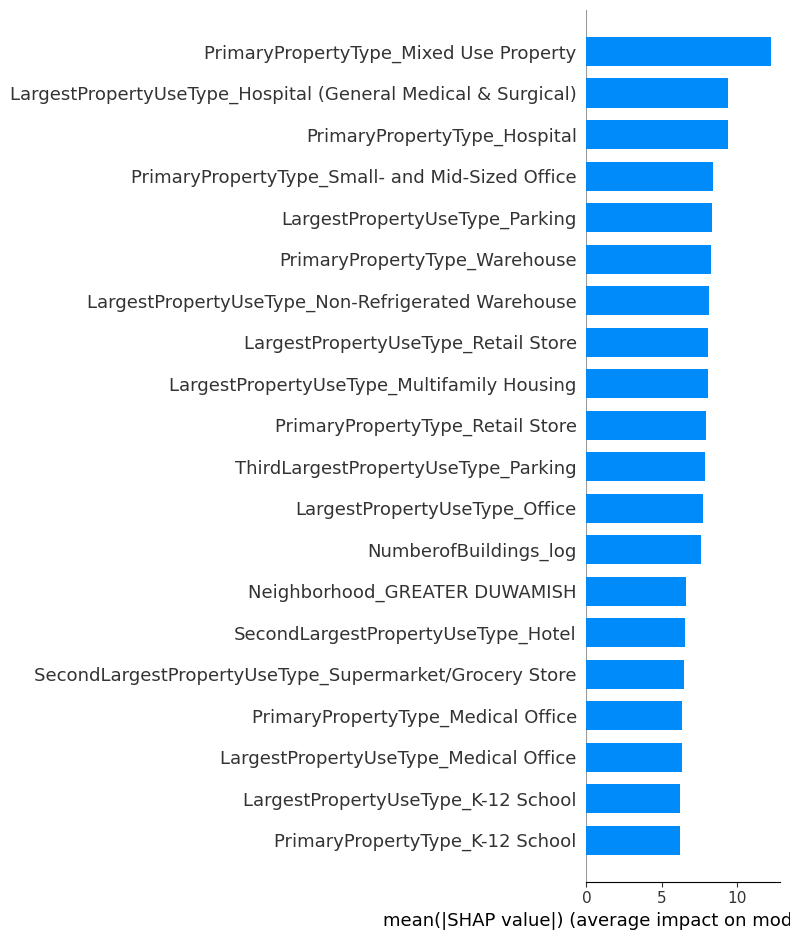

In [80]:
import shap

# Calcul des valeurs SHAP sur les données transformées par PCA
explainer = shap.Explainer(best_model_es, X_train_pca_brut_es) #sur X_train pour comprendre l’environnement d’apprentissage du modèle.
shap_values = explainer(X_test_pca_brut_es) #Quelles features ont réellement influencé les prédictions sur des données nouvelles ?

# Reconstruction des données d'origine en utilisant inverse_transform qui récupère les données dans l'espace des features originales à partir des composantes principales.
X_test_original_brut_es = pca_brut_es.inverse_transform(X_test_pca_brut_es)
shap_values_original = shap_values.values @ pca_brut_es.components_ #@ ou .dot() multiplication matricielle
#utilise les coefficients pca.components_ pour multiplier les valeurs SHAP pour obtenir 
#une estimation approximative des valeurs SHAP sur les features originales.

# Pour récupérer les noms numériques + one-hot encodés pour le diagramme
feature_names = features_quanti_ES + encoder.get_feature_names_out(features_quali).tolist()


# Diagramme SHAP
shap.summary_plot(
    shap_values_original,
    pd.DataFrame(X_test_original_brut_es, columns=feature_names),
    plot_type="bar"
)

**Le problème est qu'en utilisant inverse_transform les données d'origines sont les données One hot encodée avec les variables qualitatives. Il faudrait faire un mapping des 211 colonnes one hot encodés pour les reclassifier dans les variables explicatives catégorielles de base et faire la somme ou la moyenne des valeurs shap ?** 

### **2. Brut sans ES**

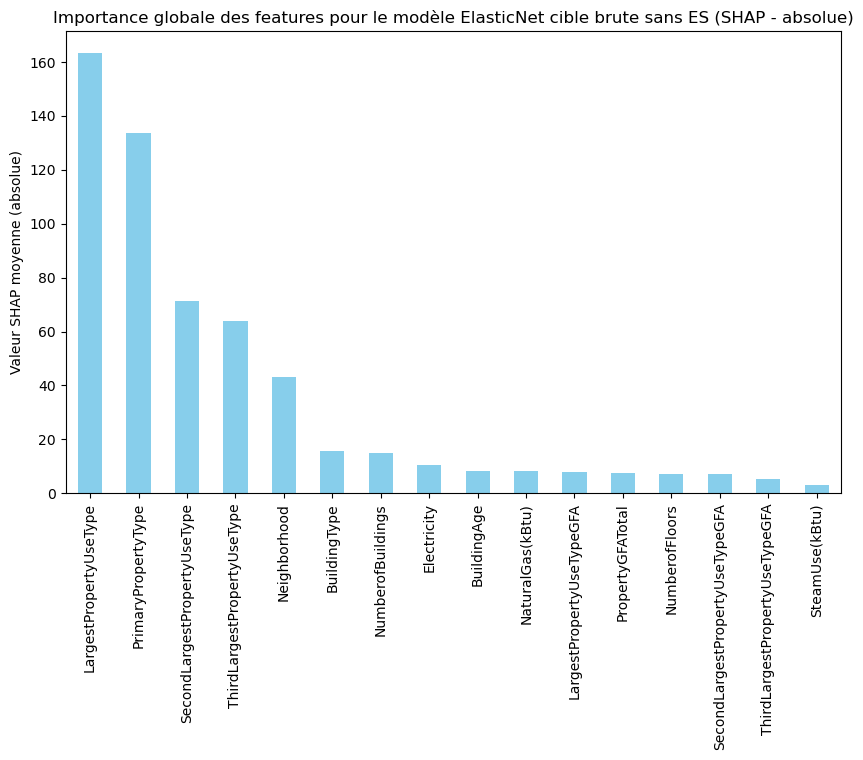

C:\Users\alaro\AppData\Local\Temp\ipykernel_14332\4127343077.py:51: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  shap_aggregated_matrix_brut = shap_df_brut.groupby(shap_df_brut.columns, axis=1).sum()
C:\Users\alaro\AppData\Local\Temp\ipykernel_14332\4127343077.py:61: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  X_aggregated_brut = X_df_brut.groupby(X_df_brut.columns, axis=1).sum()


shap_aggregated_matrix_brut.shape: (322, 16)
X_aggregated_brut.shape: (322, 16)
BuildingAge                        0.025705
BuildingType                       3.054352
Electricity                       -1.284309
LargestPropertyUseType            -1.722056
LargestPropertyUseTypeGFA          0.267690
NaturalGas(kBtu)                   1.029690
Neighborhood                       1.223107
NumberofBuildings                 -0.109428
NumberofFloors                    -0.238245
PrimaryPropertyType               -0.024885
PropertyGFATotal                   0.108330
SecondLargestPropertyUseType      -2.713328
SecondLargestPropertyUseTypeGFA   -0.326616
SteamUse(kBtu)                    -0.443983
ThirdLargestPropertyUseType       -1.815778
ThirdLargestPropertyUseTypeGFA    -0.157310
Name: 0, dtype: float64


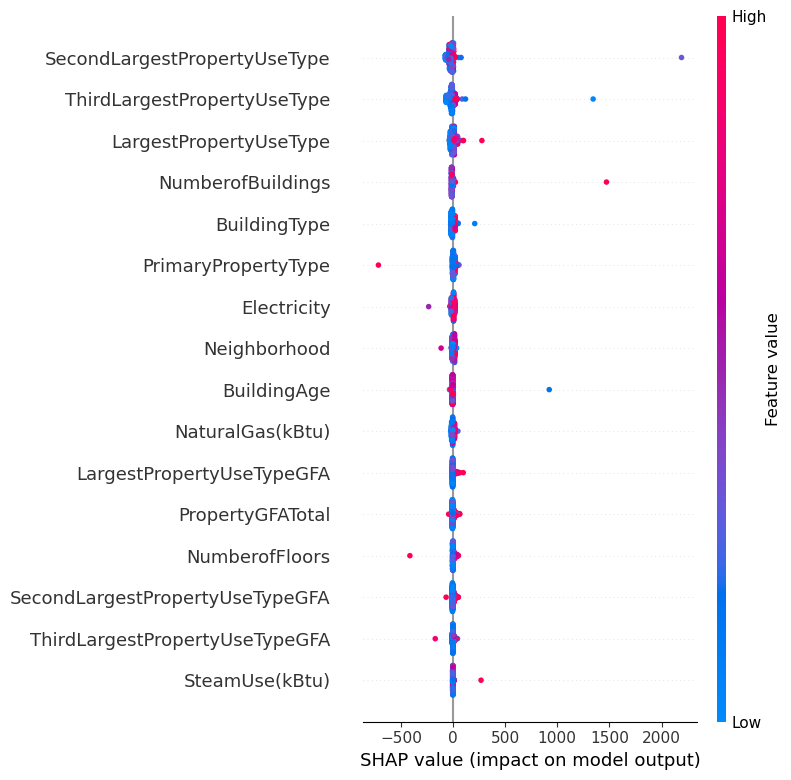

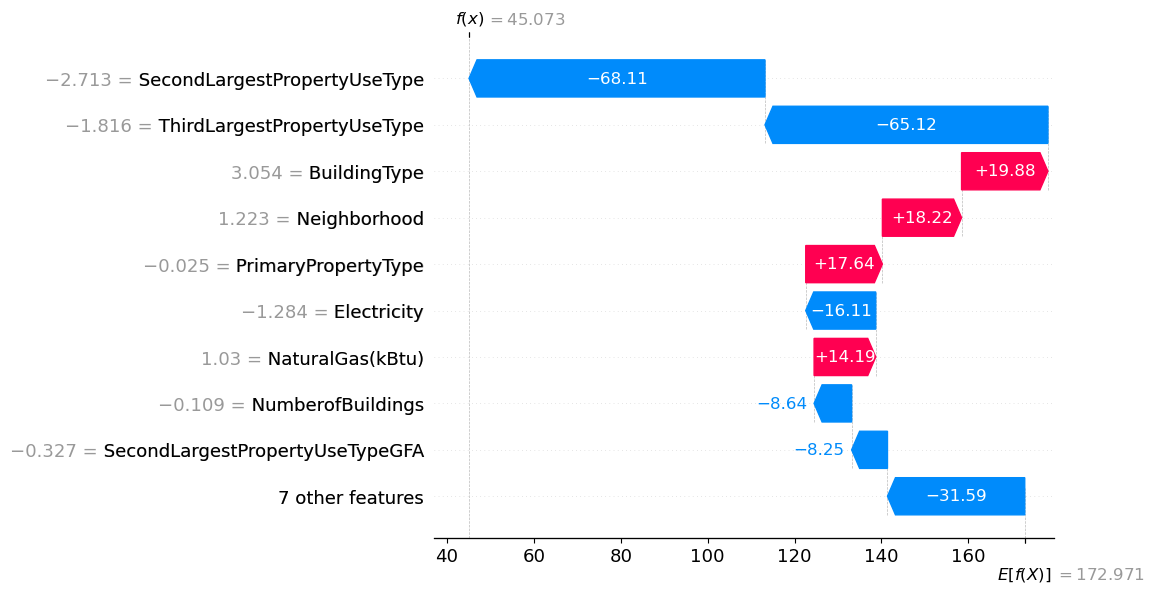

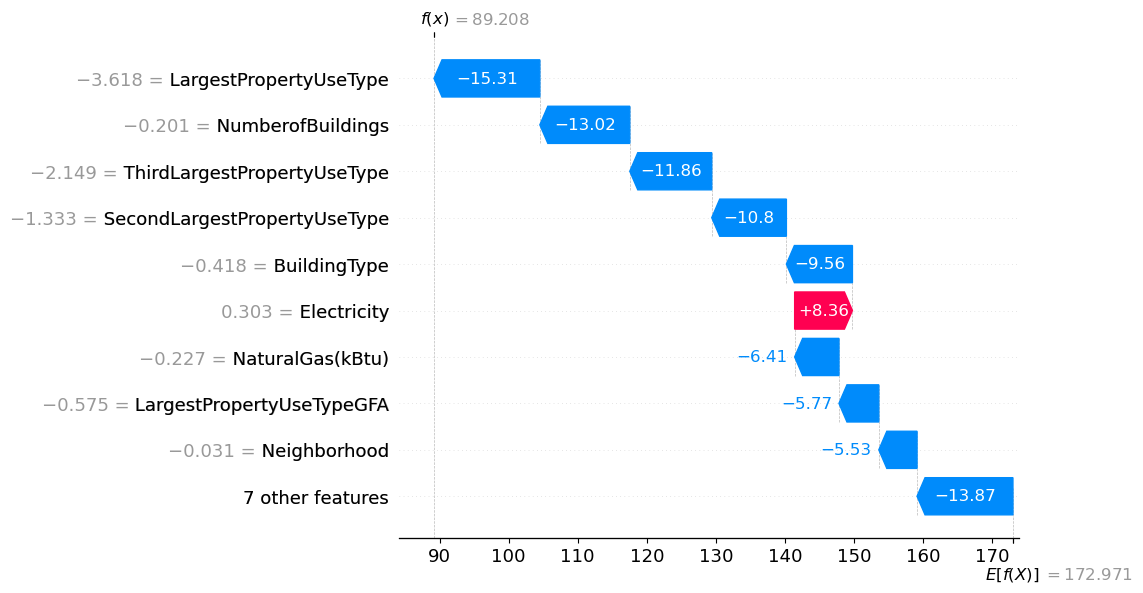

In [83]:

# Calcul des valeurs SHAP sur les données transformées par PCA
explainer = shap.Explainer(best_model, X_train_pca_brut)
shap_values = explainer(X_test_pca_brut)
#Explication du modèle (shap values) sur les données test en fonction des patterns appris sur train

# Reconstruction des données d'origine en utilisant inverse_transform qui récupére les données dans l'espace des features originales à partir des composantes principales.
X_test_original_brut = pca_brut.inverse_transform(X_test_pca_brut)
shap_values_original_brut = shap_values.values @ pca_brut.components_
#utilise les coefficients pca.components_ pour multiplier les valeurs SHAP pour obtenir 
#une estimation approximative des valeurs SHAP sur les features originales.

# Récupération des noms de features (numériques + one-hot encodées)
feature_names_brut = X_train_final_brut.columns.tolist()


# Création d'un DataFrame des valeurs SHAP
shap_df_brut = pd.DataFrame(shap_values_original_brut, columns=feature_names_brut) #df des shap values pour chaque observation

# Extraire la "feature d'origine" des variables one-hot (ex: Neighborhood_A = Neighborhood)
def nom_base_feature(name):
    return name.split('_')[0] if '_' in name else name  
    #split le nom Neighborhood_A = Neighborhood,A
    #Garde seulement le Neighborhood [0] effectue le split si _ sinon on garde le nom


# Appliquer le mapping avec la fonction
base_features_brut = [nom_base_feature(col) for col in shap_df_brut.columns]
shap_df_brut.columns = base_features_brut  # Remplacement par les noms de features regroupés


# Agrégation des valeurs SHAP par feature d'origine:
# Ici valeurs absolues seulement pour le barplot 
# Moyenne colonne par colonne = par feature encore one hot encodé (moyenne de Neighborhood_A, Neighborhood_B etc.)
# Groupby par nom level =0 nom avant underscore cf split
# Somme les moyennes des sous-catégories pour chaque feature d'origine.
# Trie
shap_aggregated_abs_brut = shap_df_brut.abs().mean(axis=0).groupby(level=0).sum().sort_values(ascending=False) #seulement pour le barplot
shap_aggregated_brut = shap_df_brut.mean(axis=0).groupby(level=0).sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
shap_aggregated_abs_brut.plot(kind='bar', color='skyblue')
plt.title("Importance globale des features pour le modèle ElasticNet cible brute sans ES (SHAP - absolue)")
plt.ylabel("Valeur SHAP moyenne (absolue)")
plt.show()

# Agrégation des valeurs SHAP par observation pour les deux autres graphiques
# on regroupe les colonnes identiques pour chaque observation.
# Par exemple, si plusieurs colonnes (one-hot) se nomment "Neighborhood", leur somme est calculée pour chaque ligne.

shap_aggregated_matrix_brut = shap_df_brut.groupby(shap_df_brut.columns, axis=1).sum()
# shap_aggregated_matrix shape= (n_observations, n_features_origin)
print("shap_aggregated_matrix_brut.shape:", shap_aggregated_matrix_brut.shape)

# Pour le Waterfall si je lui donne X_test_original il a 218 colonnes donc problèmes de shape donc création d'un nouveau df
# Créer un DataFrame pour X_test_original avec les noms initiaux
X_df_brut = pd.DataFrame(X_test_original_brut, columns=feature_names_brut)
# Remplacer les noms par ceux des features d'origine (cf shap_df)
X_df_brut.columns = [nom_base_feature(col) for col in X_df_brut.columns]
# Agréger les colonnes en groupant par le nom de base en faisant la somme 
X_aggregated_brut = X_df_brut.groupby(X_df_brut.columns, axis=1).sum()

print("X_aggregated_brut.shape:", X_aggregated_brut.shape)
print(X_aggregated_brut.iloc[0])

#Beeswarm plot:
plt.figure(figsize=(10, 6))
shap.summary_plot(
    shap_aggregated_matrix_brut.values,  # Matrice (n_obs, n_features_origin)
    features=X_aggregated_brut,            # DataFrame (n_obs, n_features_origin)
    feature_names=X_aggregated_brut.columns,
    plot_type="dot",
    show=True
)

#Waterfall plot : Explication locale pour une observation donnée
# Observation 0
shap.waterfall_plot(
    shap.Explanation(
        values=shap_aggregated_matrix_brut.iloc[0].values,  # Vecteur agrégé pour l'observation 0
        base_values=shap_values.base_values[0],          # Base value (issue du calcul SHAP en PCA)
        data=X_aggregated_brut.iloc[0].values,                # Données agrégées de l'observation 0
        feature_names=X_aggregated_brut.columns              # Noms des features agrégées
    )
)

# Waterfall plot : Prédiction individuelle observation 42
shap.waterfall_plot(
    shap.Explanation(
        values=shap_aggregated_matrix_brut.iloc[42].values,  
        base_values= shap_values.base_values[42],        
        data=X_aggregated_brut.iloc[42].values,              
        feature_names=X_aggregated_brut.columns
    )
)

In [84]:
i=0
print(f"Observation {i} dans df_final:")
print(df_filtered.iloc[i])

Observation 0 dans df_final:
OSEBuildingID                                                1
DataYear                                                  2016
BuildingType                                    NonResidential
PrimaryPropertyType                                      Hotel
PropertyName                              Mayflower park hotel
Address                                          405 Olive way
City                                                   Seattle
State                                                       WA
ZipCode                                                98101.0
TaxParcelIdentificationNumber                       0659000030
CouncilDistrictCode                                          7
Neighborhood                                          DOWNTOWN
Latitude                                               47.6122
Longitude                                           -122.33799
YearBuilt                                                 1927
NumberofBuildings         

In [85]:
i=78
print(f"Observation {i} dans df_final :")
print(df_filtered.iloc[i])

Observation 78 dans df_final :
OSEBuildingID                                            200
DataYear                                                2016
BuildingType                                  NonResidential
PrimaryPropertyType                                    Other
PropertyName                             Verity Credit Union
Address                                11027 Meridian N #102
City                                                 Seattle
State                                                     WA
ZipCode                                              98133.0
TaxParcelIdentificationNumber                     3026049024
CouncilDistrictCode                                        5
Neighborhood                                       NORTHWEST
Latitude                                            47.70956
Longitude                                          -122.3345
YearBuilt                                               1996
NumberofBuildings                                     

### *Automatisation*
**Pour alléger le notebook nous allons automatiser cette méthode pour les 4 variantes:**


=== Traitement de la variante : brute_sans_ES ===


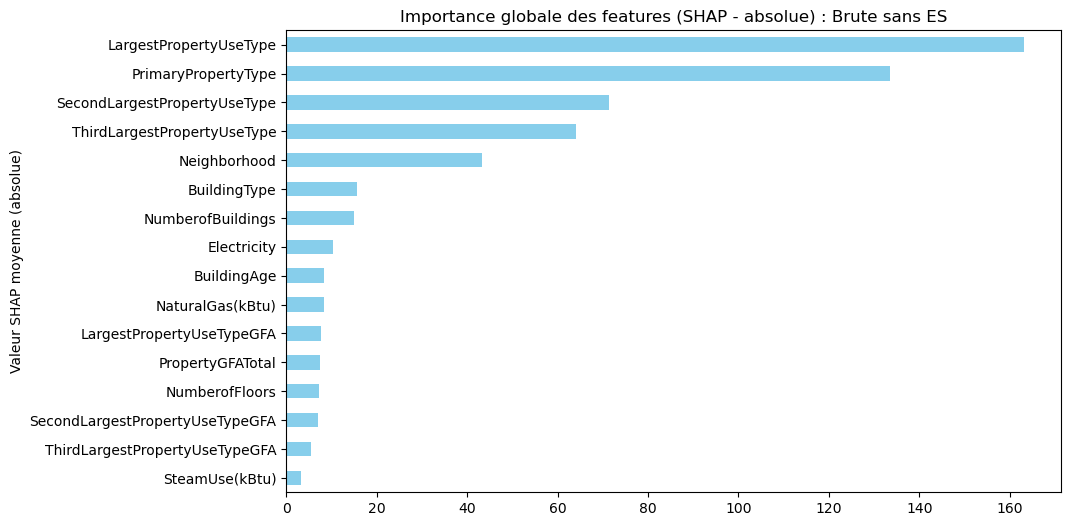

shap_aggregated_matrix.shape: (322, 16)
X_aggregated.shape: (322, 16)
Exemple d'observation agrégée: BuildingAge                        0.025705
BuildingType                       3.054352
Electricity                       -1.284309
LargestPropertyUseType            -1.722056
LargestPropertyUseTypeGFA          0.267690
NaturalGas(kBtu)                   1.029690
Neighborhood                       1.223107
NumberofBuildings                 -0.109428
NumberofFloors                    -0.238245
PrimaryPropertyType               -0.024885
PropertyGFATotal                   0.108330
SecondLargestPropertyUseType      -2.713328
SecondLargestPropertyUseTypeGFA   -0.326616
SteamUse(kBtu)                    -0.443983
ThirdLargestPropertyUseType       -1.815778
ThirdLargestPropertyUseTypeGFA    -0.157310
Name: 0, dtype: float64


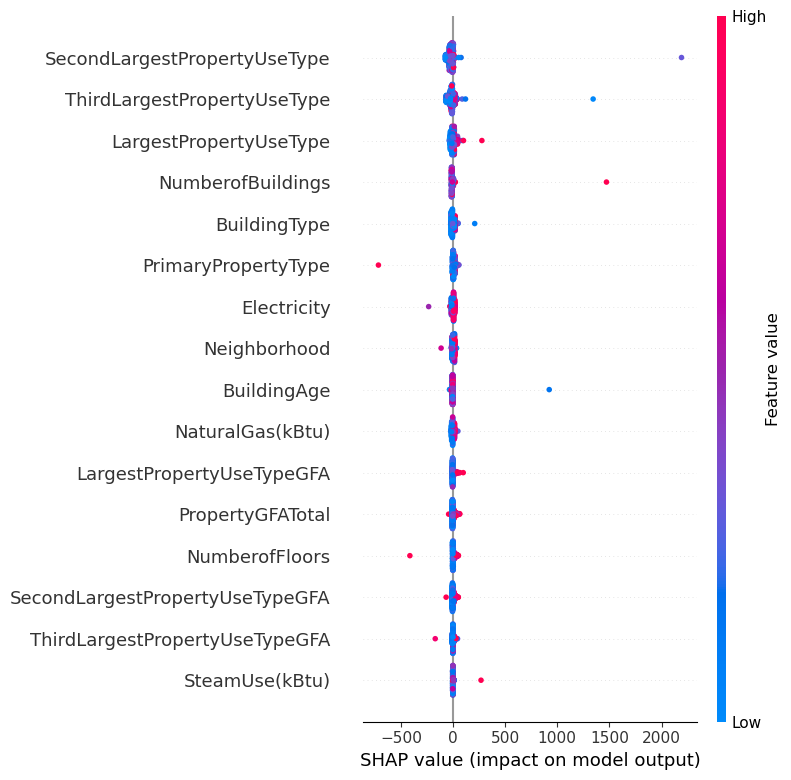

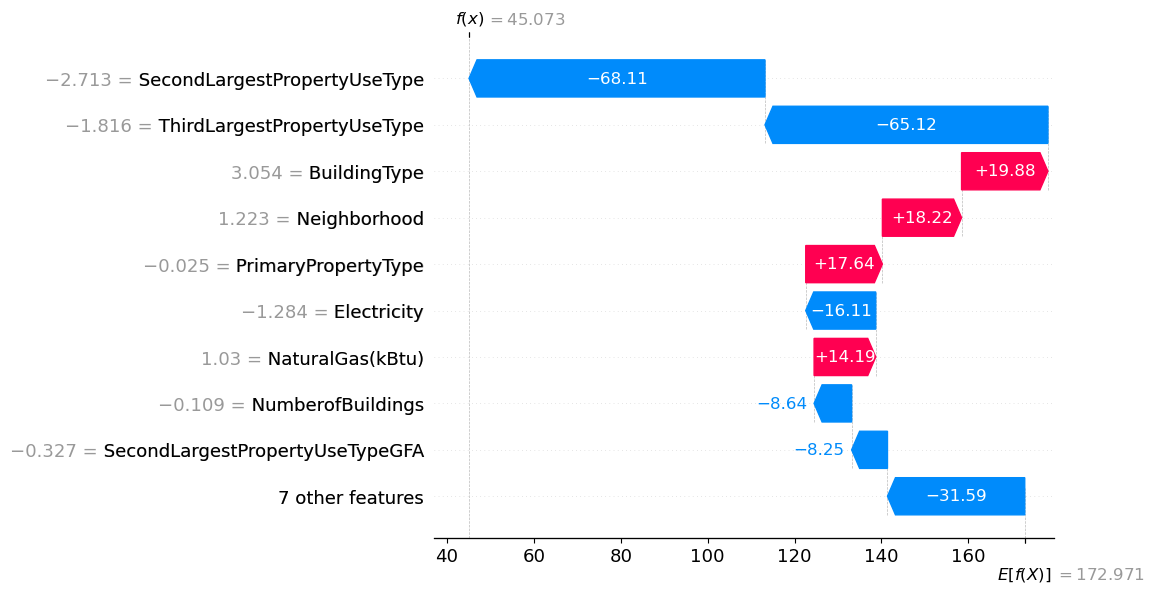

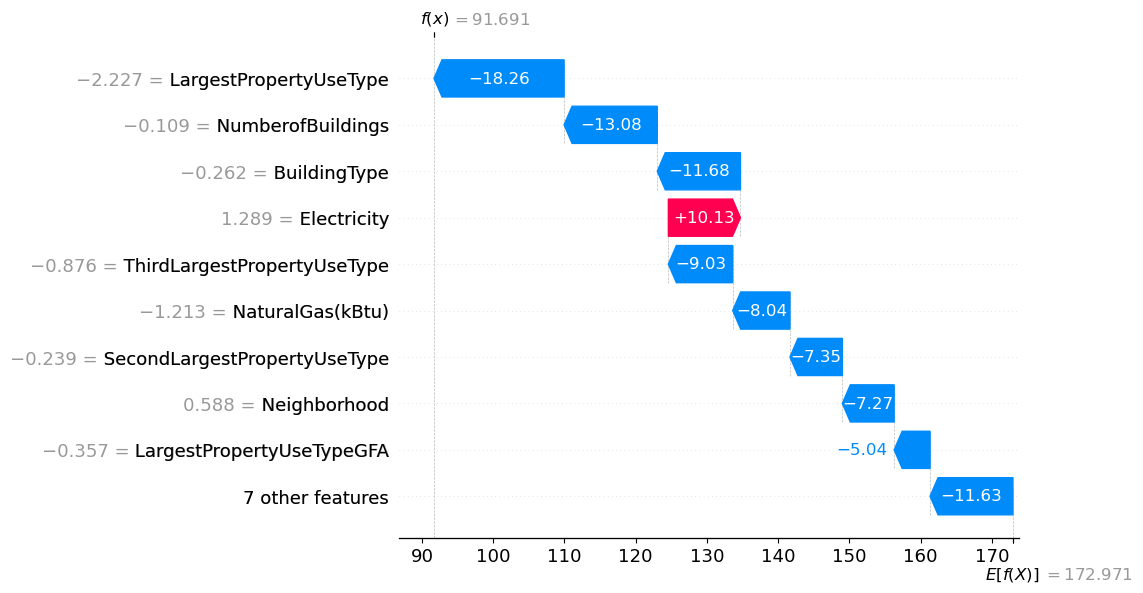


=== Traitement de la variante : log_sans_ES ===


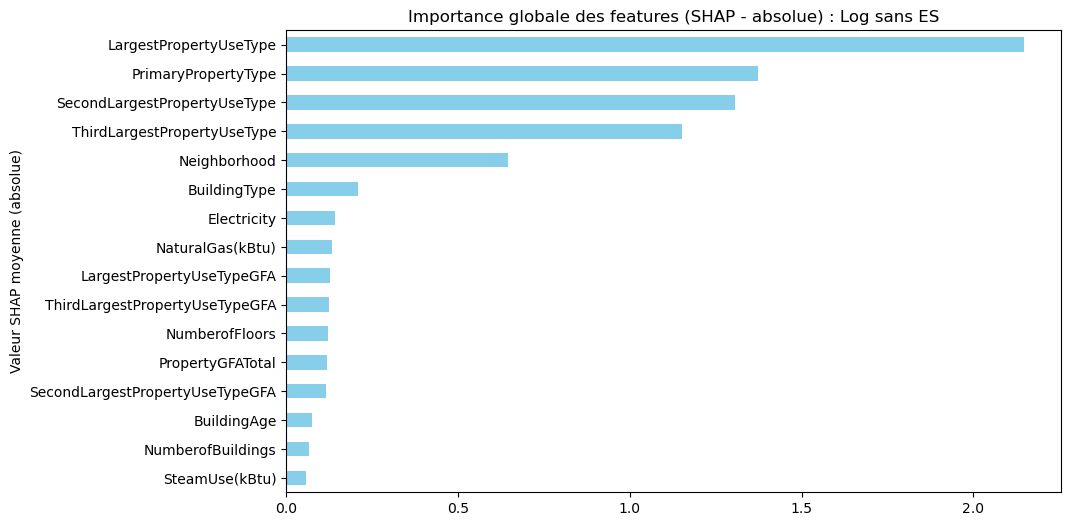

shap_aggregated_matrix.shape: (322, 16)
X_aggregated.shape: (322, 16)
Exemple d'observation agrégée: BuildingAge                       -0.072074
BuildingType                       3.059528
Electricity                       -1.256565
LargestPropertyUseType            -1.943385
LargestPropertyUseTypeGFA          0.798554
NaturalGas(kBtu)                   0.992030
Neighborhood                       1.188965
NumberofBuildings                 -0.011125
NumberofFloors                    -0.196293
PrimaryPropertyType               -0.032466
PropertyGFATotal                   0.527926
SecondLargestPropertyUseType      -2.764218
SecondLargestPropertyUseTypeGFA   -1.231953
SteamUse(kBtu)                    -0.442049
ThirdLargestPropertyUseType       -1.436321
ThirdLargestPropertyUseTypeGFA    -0.505289
Name: 0, dtype: float64


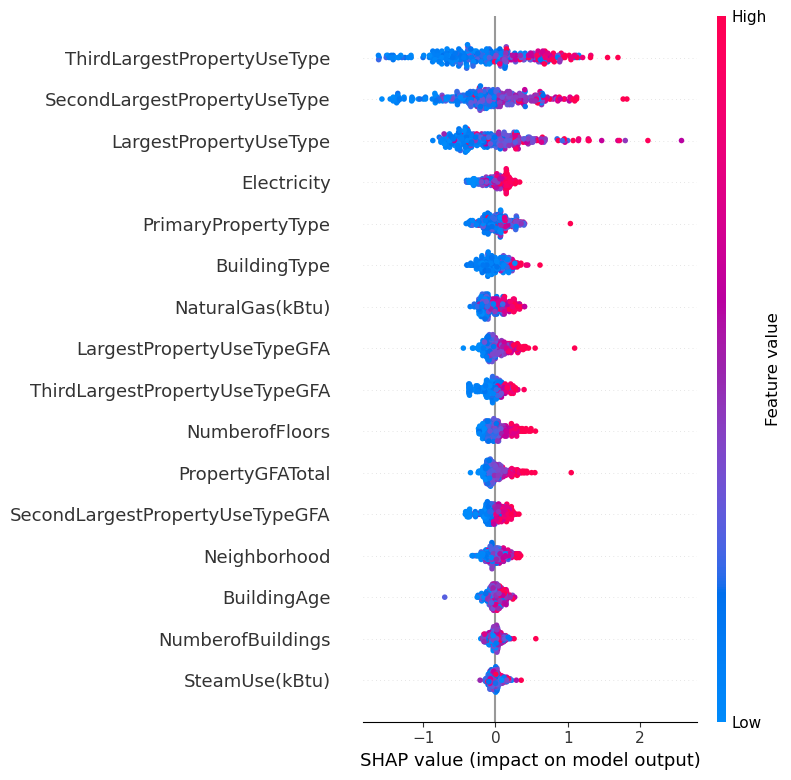

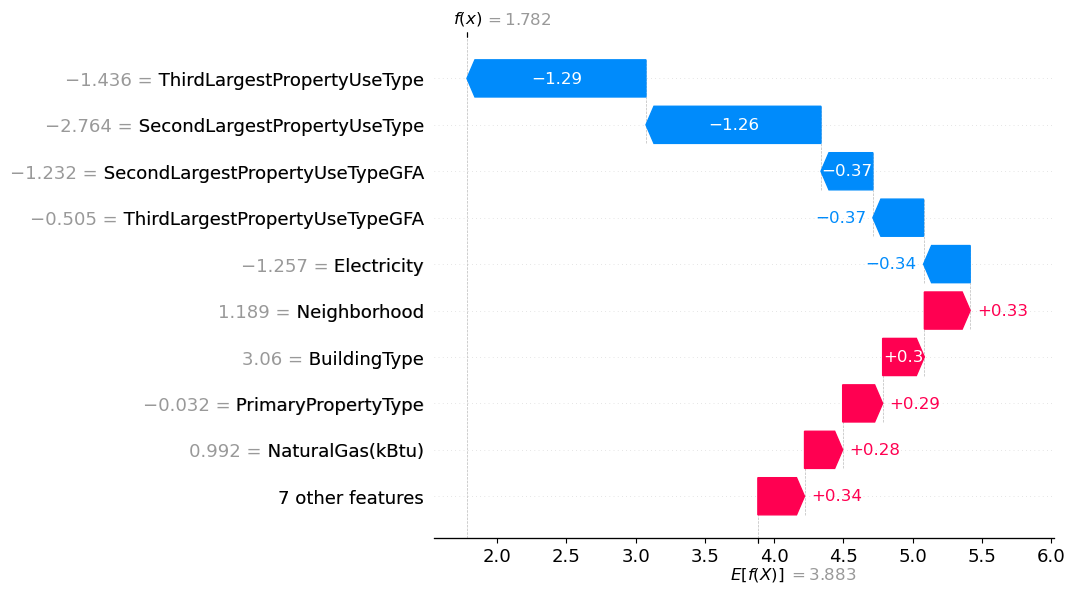

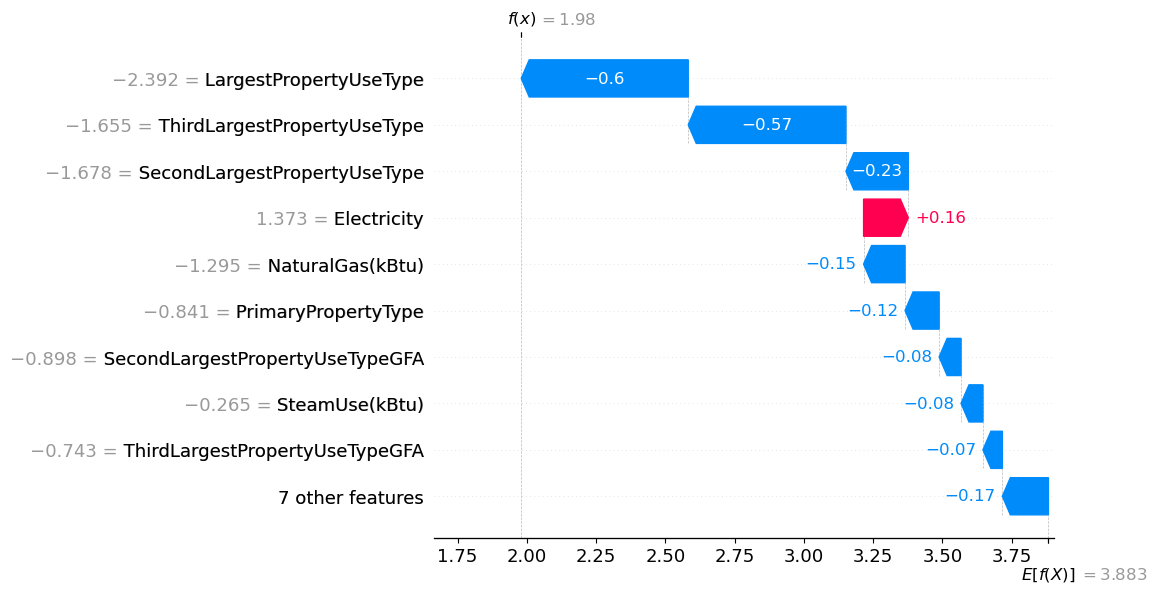


=== Traitement de la variante : brute_avec_ES ===


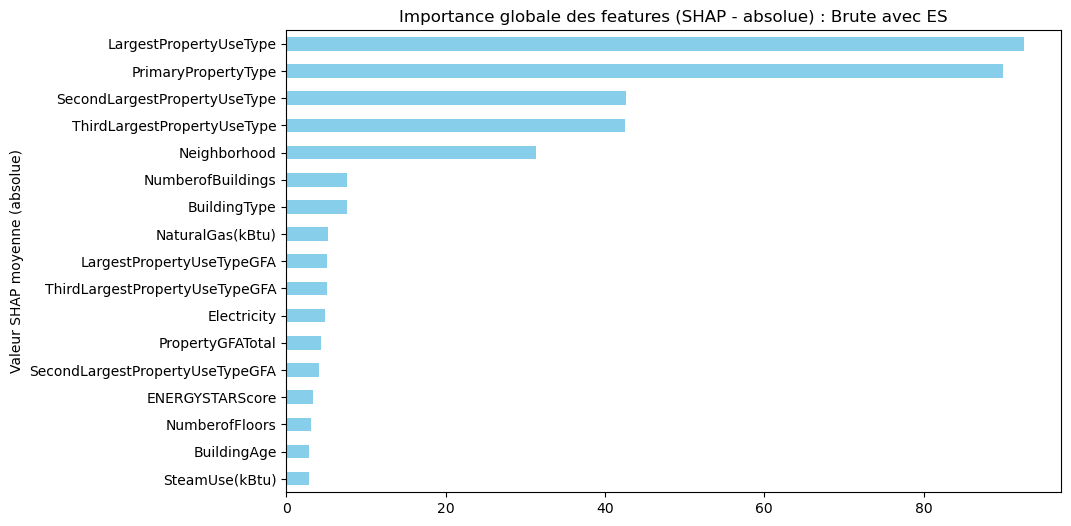

shap_aggregated_matrix.shape: (213, 17)
X_aggregated.shape: (213, 17)
Exemple d'observation agrégée: BuildingAge                       -0.122250
BuildingType                       0.051148
ENERGYSTARScore                    0.286408
Electricity                       -0.409166
LargestPropertyUseType             1.336800
LargestPropertyUseTypeGFA          0.612259
NaturalGas(kBtu)                   0.431911
Neighborhood                      -0.316763
NumberofBuildings                 -0.137717
NumberofFloors                     1.497733
PrimaryPropertyType                0.318721
PropertyGFATotal                   0.735439
SecondLargestPropertyUseType       1.591426
SecondLargestPropertyUseTypeGFA    0.602197
SteamUse(kBtu)                     0.631238
ThirdLargestPropertyUseType        2.154198
ThirdLargestPropertyUseTypeGFA     0.965874
Name: 0, dtype: float64


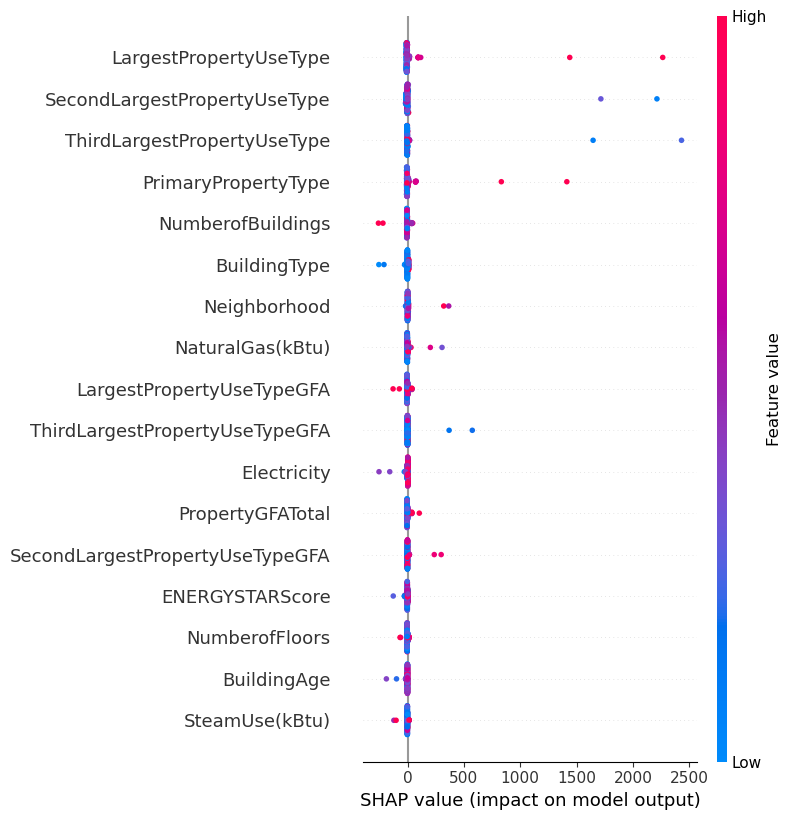

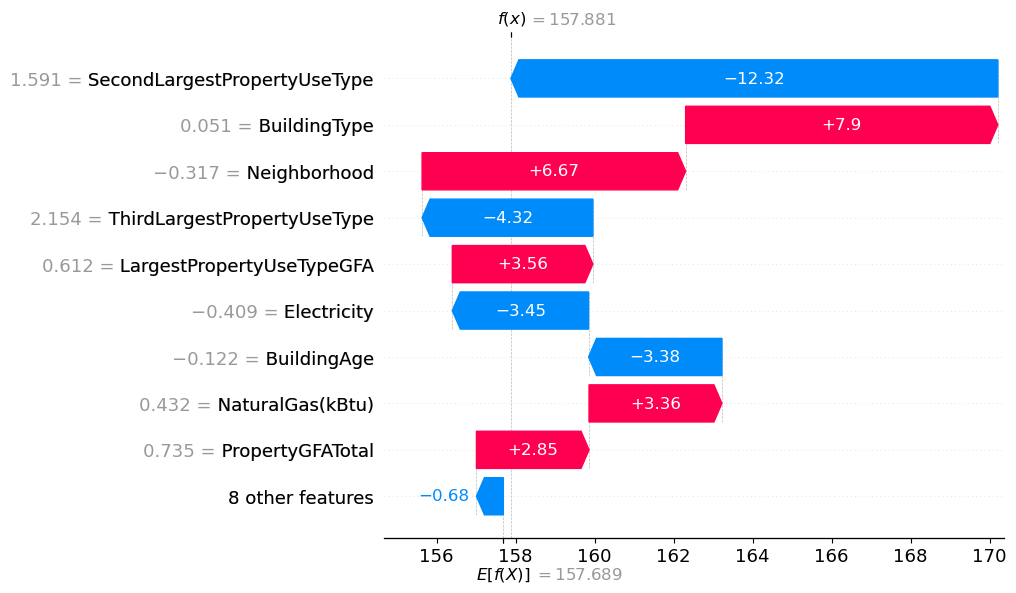

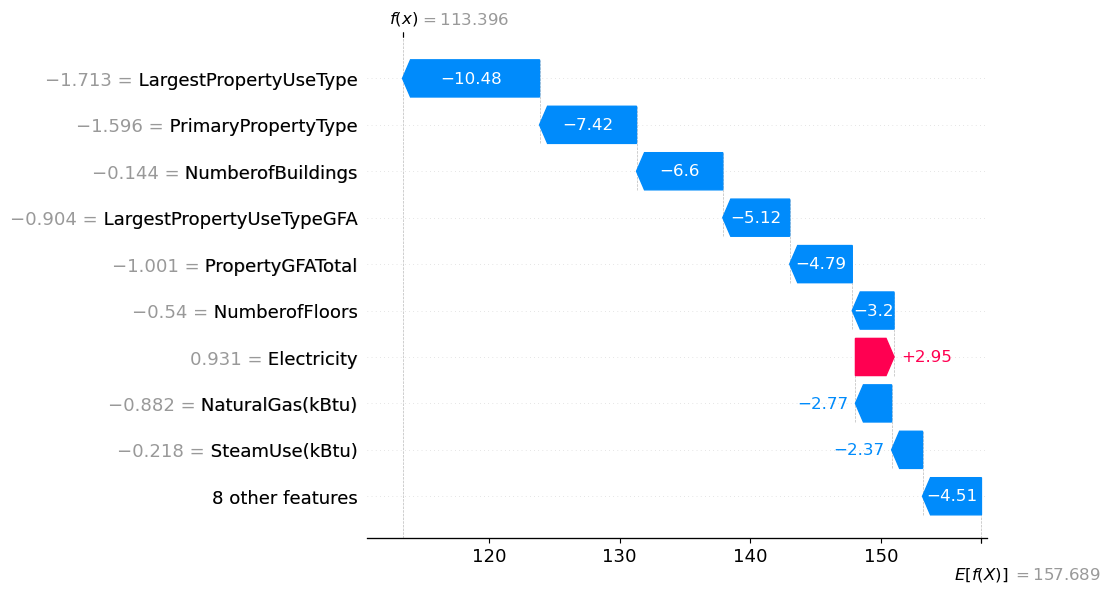


=== Traitement de la variante : log_avec_ES ===


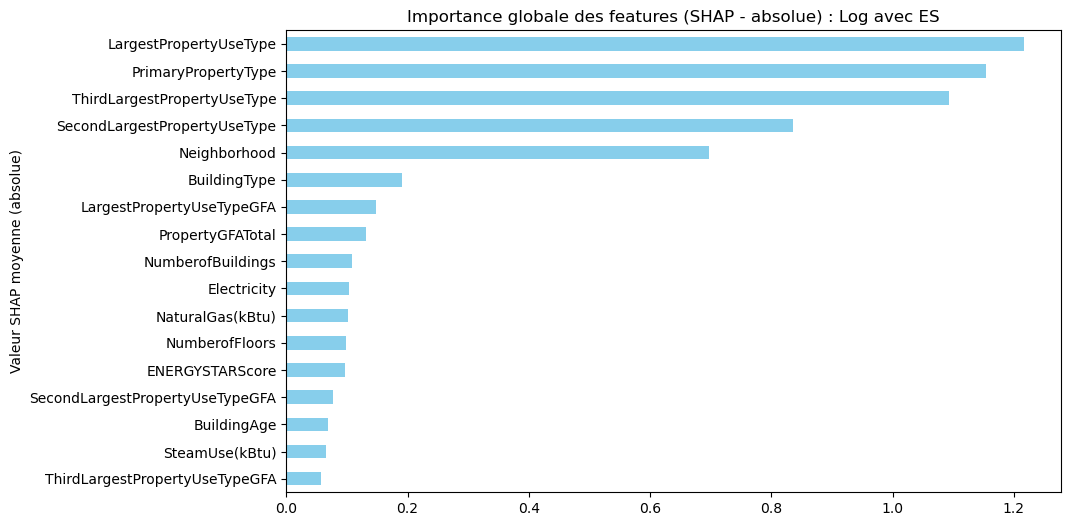

shap_aggregated_matrix.shape: (213, 17)
X_aggregated.shape: (213, 17)
Exemple d'observation agrégée: BuildingAge                       -0.122250
BuildingType                       0.051148
ENERGYSTARScore                    0.286408
Electricity                       -0.409166
LargestPropertyUseType             1.336800
LargestPropertyUseTypeGFA          0.612259
NaturalGas(kBtu)                   0.431911
Neighborhood                      -0.316763
NumberofBuildings                 -0.137717
NumberofFloors                     1.497733
PrimaryPropertyType                0.318721
PropertyGFATotal                   0.735439
SecondLargestPropertyUseType       1.591426
SecondLargestPropertyUseTypeGFA    0.602197
SteamUse(kBtu)                     0.631238
ThirdLargestPropertyUseType        2.154198
ThirdLargestPropertyUseTypeGFA     0.965874
Name: 0, dtype: float64


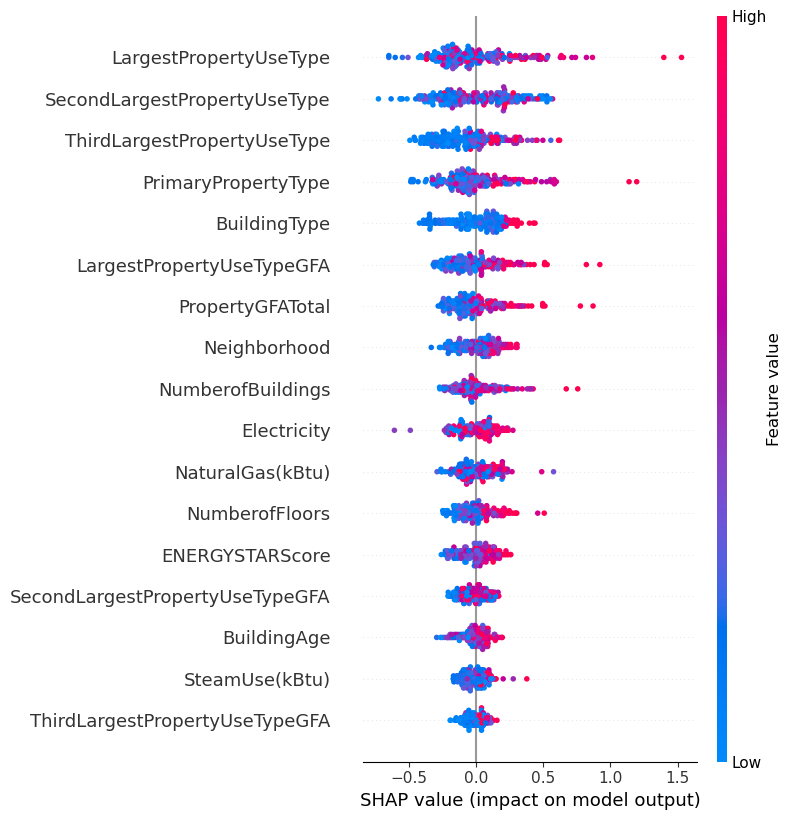

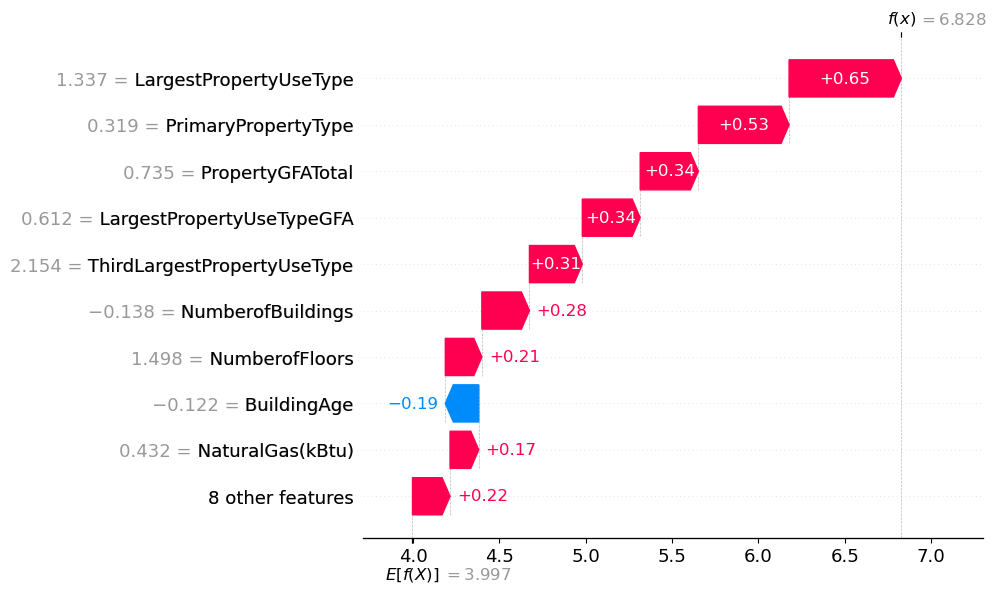

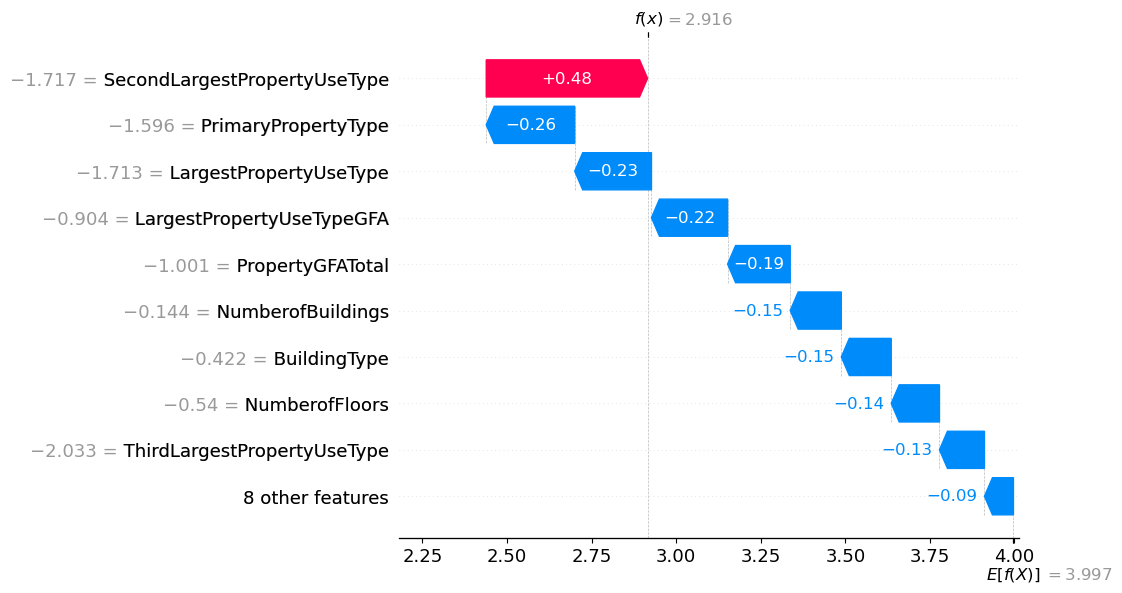

In [87]:
# Fonction pour extraire le nom de base d'une feature (ex. "Neighborhood_A" → "Neighborhood")
def nom_base_feature(name):
    return name.split('_')[0] if '_' in name else name

# Fonction pour calculer et créer les 3 graphiques de feature importance
def feature_importance(model, X_train_pca, X_test_pca, pca,
                       quanti, encoder, quali, X_train_final,
                       target_name="Target", obs_index=0):
    """
    Calcule les valeurs SHAP et génère 3 graphiques :
      - Barplot de l'importance globale (moyenne absolue)
      - Beeswarm plot basé sur l'agrégation locale des SHAP
      - Waterfall plot pour deux observations
    
    Parameters:
      model             : Modèle entraîné
      X_train_pca       : Données d'entraînement transformées par PCA
      X_test_pca        : Données de test transformées par PCA
      pca               : Objet PCA (pour inverse_transform)
      quanti            : Liste des features numériques
      encoder           : Objet OneHotEncoder
      quali             : Liste des noms des variables catégorielles
      target_name       : Nom descriptif de la variante
      obs_index         : Indice de l'observation pour le waterfall plot (par défaut 0)
    """
    
    # 1. Calcul des valeurs SHAP dans l'espace PCA
    explainer = shap.Explainer(model, X_train_pca)
    shap_values = explainer(X_test_pca)
    
    # 2. Rétro-projection : reconstruit les données d'origine et projette les SHAP
    X_test_original = pca.inverse_transform(X_test_pca)
    shap_values_original = np.dot(shap_values.values, pca.components_)
    
    # 3. Récupération des noms de features (numériques + one-hot)
    feature_names = X_train_final.columns.tolist()
    
    # 4. Création d'un DataFrame des valeurs SHAP et application du mapping sur les colonnes
    shap_df = pd.DataFrame(shap_values_original, columns=feature_names)
    base_features = [nom_base_feature(col) for col in shap_df.columns]
    shap_df.columns = base_features
    
    # 5. Calcul global pour le barplot (moyenne absolue sur toutes les observations)
    shap_aggregated_abs = shap_df.abs().mean(axis=0).groupby(lambda x: x).sum().sort_values(ascending=True)
    
    plt.figure(figsize=(10, 6))
    shap_aggregated_abs.plot(kind='barh', color='skyblue')
    plt.title(f"Importance globale des features (SHAP - absolue) : {target_name}")
    plt.ylabel("Valeur SHAP moyenne (absolue)")
    plt.show()
    
    # 6. Agrégation locale des valeurs SHAP par observation
    shap_aggregated_matrix = shap_df.T.groupby(lambda x: x).sum().T
    print("shap_aggregated_matrix.shape:", shap_aggregated_matrix.shape)
    
    # 7. Agrégation des données d'entrée de la même manière
    X_df = pd.DataFrame(X_test_original, columns=feature_names)
    X_df.columns = [nom_base_feature(col) for col in X_df.columns]
    X_aggregated = X_df.T.groupby(lambda x: x).sum().T
    print("X_aggregated.shape:", X_aggregated.shape)
    print("Exemple d'observation agrégée:", X_aggregated.iloc[0])
    
    # 8. Beeswarm plot : affiche la dispersion locale des valeurs SHAP agrégées
    plt.figure(figsize=(10, 6))
    shap.summary_plot(
        shap_aggregated_matrix.values,
        features=X_aggregated,
        feature_names=X_aggregated.columns,
        plot_type="dot",
        show=True
    )
    
    # 9. Waterfall plot pour l'observation choisie
    shap.waterfall_plot(
        shap.Explanation(
            values=shap_aggregated_matrix.iloc[obs_index].values,
            base_values=shap_values.base_values[obs_index],
            data=X_aggregated.iloc[obs_index].values,
            feature_names=X_aggregated.columns
        )
    )
    if X_aggregated.shape[0] > 78:
        shap.waterfall_plot(
            shap.Explanation(
                values=shap_aggregated_matrix.iloc[78].values,
                base_values=shap_values.base_values[78],
                data=X_aggregated.iloc[78].values,
                feature_names=X_aggregated.columns
            )
        )

# 4  variantes :
variantes = {
    "brute_sans_ES": {
        "model": best_model,
        "X_train_pca": X_train_pca_brut,
        "X_test_pca": X_test_pca_brut,
        "pca": pca_brut,
        "quanti": colonnes_quanti_hors_ES,
        "encoder": encoder,
        "quali": colonnes_quali,
        "X_train_final": X_train_final_brut,
        "target_name": "Brute sans ES"
    },
    "log_sans_ES": {
        "model": best_model_log,
        "X_train_pca": X_train_pca_transformed,
        "X_test_pca": X_test_pca_transformed,
        "pca": pca_transformed,
        "quanti": colonnes_quanti_transformed_hors_ES,
        "encoder": encoder,
        "quali": colonnes_quali,
        "X_train_final": X_train_final_transformed,
        "target_name": "Log sans ES"
    },
    "brute_avec_ES": {
        "model": best_model_es,
        "X_train_pca": X_train_pca_brut_es,
        "X_test_pca": X_test_pca_brut_es,
        "pca": pca_brut_es,
        "quanti": features_quanti_ES, 
        "encoder": encoder,
        "quali": features_quali,
        "X_train_final": X_train_final_brut_es,
        "target_name": "Brute avec ES"
    },
    "log_avec_ES": {
        "model": best_model_log_es,
        "X_train_pca": X_train_pca_transformed_es,
        "X_test_pca": X_test_pca_transformed_es,
        "pca": pca_transformed_es,
        "quanti": features_quanti_transformed_ES,
        "encoder": encoder,
        "quali": features_quali,
        "X_train_final": X_train_final_transformed_es,
        "target_name": "Log avec ES"
    }
}

# Boucle sur les variantes 
for variant_name, params in variantes.items():
    print(f"\n=== Traitement de la variante : {variant_name} ===")
    feature_importance(
        model=params["model"],
        X_train_pca=params["X_train_pca"],
        X_test_pca=params["X_test_pca"],
        pca=params["pca"],
        quanti=params["quanti"],
        encoder=params["encoder"],
        quali=params["quali"],
        X_train_final = params["X_train_final"],
        target_name=params["target_name"],
        obs_index=0 
    )


**Interprétation:**

- Nous remarquons bien que la variable Energystarscore n'influe pas sur la variable cible TotalGHGEmissions.
- Les features de type d'utilisation ont un impact le plus important pour les cibles brute et log
- Le beeswarm montre une vraie disparité des observation ce qui sous entend que les variables explicatives ont un impact différent selon les observations.
- Ce que nous retrouvons bien avec les waterfalls plot. Selon les observations et selon les variantes les features n'ont pas du tout le même impact sur la prédiction. 

**Waterfall plot:**
- F(x) = la prédiction finale du modèle pour cette instance. Ici elle est plus faible que la valeur moyenne car la plupart des features font baisser la prédiction pour cette observation.
- E(f(x)) = est la valeur moyenne des prédictions du modèle sur l’ensemble des données. Elle représente la prédiction attendue avant d’inclure l’influence spécifique des variables.

**Beeswarm plot**:
Couleur bleu = valeur faible
Couleur rouge = valeur forte
Chaque point représente une observation de l'ensemble des données 